<h1>MOF SYNTHESIS</h1>

In [1]:
# Importing libraries
import numpy as np
import time 
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'src')))


from science_jubilee.Machine import Machine
from science_jubilee.tools.Tool import Tool
from science_jubilee.decks.Deck import Deck
from science_jubilee.labware.Labware import Labware, Location, Well
# from science_jubilee.tools.Pipette import Pipette
from science_jubilee.tools.Double_Syringe import DoubleSyringe
from science_jubilee.tools.Syringe import Syringe
from science_jubilee.tools.Vacuum_Gripper import VacuumGripper
from science_jubilee.tools.Oceandirect_axo import Spectrometer

In [2]:
# Manual Offsetting 

deck = Deck("lab_automation_deck") # We are not using the deck, so operate any deck.json 

solvents = deck.load_labware("uwsunlab_2_wellplate_60000ul_slot3.json", slot = 3, has_lid_on_top= True, currentLiquidVolume= 60)
solvents.manual_offset_small_plate([[245.0, 155.8], [197.0, 155.8]], save = True)

# -------------Position JSON file for Single Syringe ---------------------#
samples2_ssy = deck.load_labware("uwsunlab_10_wellplate_14000ul_ssy_1.json", slot = 2, has_lid_on_top= False) 
samples2_ssy.manual_offset2([[132.0, 134.0], [38.0, 134.0], [38.0, 175.0]], save = True)
samples5_ssy = deck.load_labware("uwsunlab_10_wellplate_14000ul_ssy_2.json", slot = 5, has_lid_on_top= False)
samples5_ssy.manual_offset2([[271.0, 231.0], [177.0, 231.0], [177.0, 273.0]], save = True)
    
# -------------Position JSON file for Dual Syringe ---------------#
samples2_sy = deck.load_labware('uwsunlab_10_wellplate_14000ul_sy_1.json', slot = 2, has_lid_on_top= False)       #new config
samples2_sy.manual_offset2([[130.7, 131.6],[37.7, 131.6], [37.7, 172.6]], save = True)
samples5_sy = deck.load_labware('uwsunlab_10_wellplate_14000ul_sy_2.json', slot = 5, has_lid_on_top= False)     #new config
samples5_sy.manual_offset2([[270.0, 228.0], [178.0, 228.0], [177.0, 270.0]], save = True)

precursors = deck.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot = 1, has_lid_on_top= True, currentLiquidVolume= 60)
precursors.manual_offset_small_plate([[245.0, 60.0], [197.0, 60.0]], save = True)

# -----------Position JSON file for Spectrometer----------------# 
samples2_spec = deck.load_labware('uwsunlab_10_wellplate_14000ul_spec_1.json', slot = 2, has_lid_on_top= False)   #new config
samples2_spec.manual_offset2([[130.6, 133.1],[35.7, 133.0], [35.6, 173.7]], save = True)
samples5_spec = deck.load_labware('uwsunlab_10_wellplate_14000ul_spec_2.json', slot = 5, has_lid_on_top= False)   #new config
samples5_spec.manual_offset2([[269.8, 229.3], [176.3, 230.0], [176.6, 271.2]], save = True)

Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved


In [3]:
# Intialising and homing the Machine 
# Switch on the button on the machine

axo = Machine(address = '192.168.1.2')

Caution : Before running the below code cell, please remove any labwares on slot0 and slot1 before homing. 


In [4]:
axo.home_all()
axo.move_to(z=180) # Safest Z location

In [5]:
# Loading the labwares
# Select 2 for everything

deck = axo.load_deck("lab_automation_deck")

solvents = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot3.json', slot= 3, has_lid_on_top= True, currentLiquidVolume= 60)
solvents.load_manualOffset()
trash = (-0.9, 55.8, 99)

## ---------------------Single Syringe Pump ----------------------------##
samples2_ssy = axo.load_labware('uwsunlab_10_wellplate_14000ul_ssy_1.json', slot= 2, has_lid_on_top= False)         #new config
samples2_ssy.load_manualOffset()
samples5_ssy = axo.load_labware('uwsunlab_10_wellplate_14000ul_ssy_2.json', slot= 5, has_lid_on_top= False)         #new config
samples5_ssy.load_manualOffset()

## ---------------------Dual Syringe Pump ----------------------------##
samples2_sy = axo.load_labware('uwsunlab_10_wellplate_14000ul_sy_1.json', slot= 2, has_lid_on_top= False)         #new config
samples2_sy.load_manualOffset()
samples5_sy = axo.load_labware('uwsunlab_10_wellplate_14000ul_sy_2.json', slot= 5, has_lid_on_top= False)         #new config
samples5_sy.load_manualOffset()

precursors = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot= 1, has_lid_on_top= True, currentLiquidVolume= 60)
precursors.load_manualOffset()

## --------------------------Spectrometer -------------------------------##
samples2_spec = axo.load_labware('uwsunlab_10_wellplate_14000ul_spec_1.json', slot= 2, has_lid_on_top= False)  #new config
samples2_spec.load_manualOffset()
samples5_spec = axo.load_labware('uwsunlab_10_wellplate_14000ul_spec_2.json', slot= 5, has_lid_on_top= False)  #new config
samples5_spec.load_manualOffset()

## ------------------------Vacuum Gripper --------------------------------##
vacuum_location = {0: {"loc": (84, 51, 0), "labwares_list": []},                                             # Slot 0
                   1: {"loc": (225, 57, 0), "labwares_list": [precursors]},                                  # Slot 1 (2 Precursor Container)
                   2: {"loc": (84, 147, 0), "labwares_list": [samples2_ssy, samples2_sy, samples2_spec]},    # Slot 2 (10 Well Plate)
                   3: {"loc": (225, 149, 0), "labwares_list": [solvents]},                                   # Slot 3 (Solvent & Cleansing liquid Container)
                   4: {"loc": (79, 244, 0), "labwares_list": []},                                            # Slot 4 (Lid Containter)
                   5: {"loc": (221, 244, 0), "labwares_list": [samples5_ssy, samples5_sy, samples5_spec]}  }  # Slot 5 (10 Well Plate)                        

Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 


In [6]:
# Loading the Dual Syringe

single_syringe = Syringe(index = 0, 
                        name = 'single_syringe', 
                        config = 'single_syringe')
# You always need to load your tool to the machine
axo.load_tool(single_syringe)


# Loading the Dual Syringe

dual_syringe = DoubleSyringe(index = 2, 
                        name = 'Dual_Syringe', 
                        config = '10cc_syringe')
# You always need to load your tool to the machine
axo.load_tool(dual_syringe)



# Load the Vacumm Gripper
gripper = VacuumGripper(index = 4, 
                        name = 'Vacuum_Gripper', 
                        vacuum_pin = 0,
                        limit_switch_pin = 2)
axo.load_tool(gripper)

Fill in the relevant details as parameters before running the Spectrometer initialization code block 

In [7]:
# Load the spectrometer

spectrometer = Spectrometer(index = 3, 
                            name = 'Spectrometer', 
                            base_dir=r"C:\Axo\science-jubilee\axo\spectrum_data",
                            experiment_name= 'ZIF-67 Synthesis - 5 identical vials', 
                            operator_name= 'Shuan',
                            target_compound='ZIF-67', 
                            # project_id = 'MOF_Phase1', 
                            experiment_notes= 'Synthesis of 5 identical vials of MOF', 
                            solvent = 'methanol', 
                            temperature_c= 25)
                            # ref_dark = 'dark_20250708_165121.npy',
                            # ref_white = 'white_20250708_165110.npy')
axo.load_tool(spectrometer)

Opened Spectrometer 2


Caution:  
1. MAKE SURE THAT THE TOOLS ARE ALL IN THEIR CORRECT PLACE. DO A TEST RUN OF PICKING UP AND PARKING ALL THE TOOLS BEFORE STARTING THE EXPERIMENT  

2. Ensure all labwares including the precursors and the samples are in the correct slot

3. Single Syringe needs to be manually resetted before each experiment

4. Dual Syringe needs to be manually resetted beefore each experiment

5. Make sure the beaker and the vials have the same amount of liquid as mentioned in the initialization of the labwares 

[2025-07-28 19:28:05] Picked Up Vacuum Gripper

[2025-07-28 19:28:25] Picked Lid from Slot 3 and Placed Lid in Slot 4

[2025-07-28 19:28:33] Parked Vacuum Gripper

[2025-07-28 19:28:43] Picked Up Spectrometer

[2025-07-28 19:28:52] Positioned Probe to collect the dark reference spectrum. 
Kindly switch off the probe light

[2025-07-28 19:29:14] Recording dark reference spectrum

[2025-07-28 19:29:15] Kindly switch on the probe light

[2025-07-28 19:29:26] Recording white reference spectrum

[2025-07-28 19:29:26] Configured Spectrometer

[2025-07-28 19:29:35] Parked Spectrometer

[2025-07-28 19:29:47] Picked Up Vacuum Gripper

[2025-07-28 19:30:07] Picked Lid from Slot 1 and Placed Lid in Slot 4

[2025-07-28 19:30:15] Parked Vacuum Gripper

[2025-07-28 19:30:26] Picked Up Dual Syringe

[2025-07-28 19:33:58] Dual Syringe Refilled

[2025-07-28 19:33:58] Sleeping for 10 seconds to let the drops fall off

[2025-07-28 19:34:19] Parked Dual Syringe

[2025-07-28 19:34:29] Picked Up Single Syri

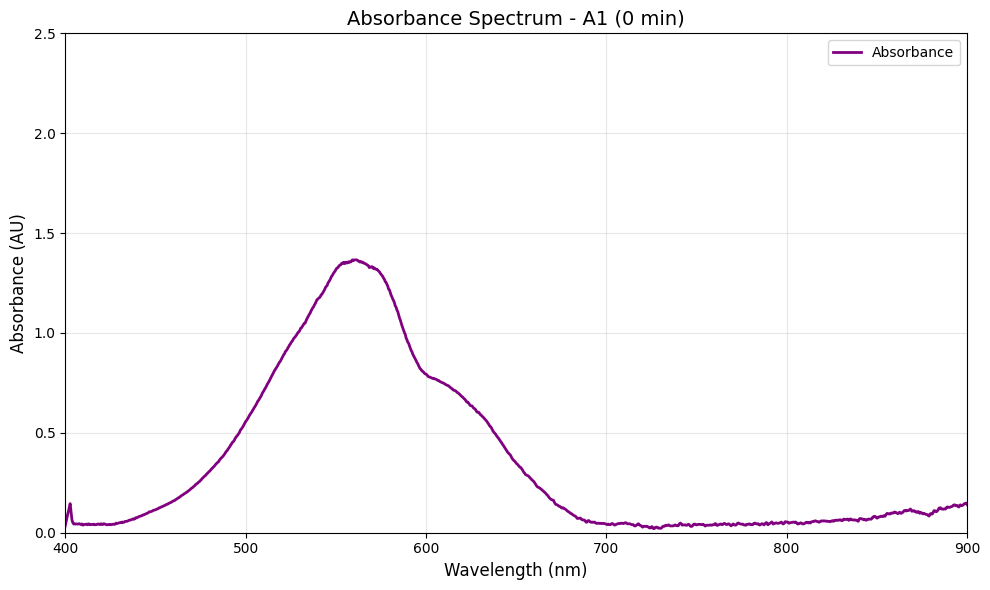

[2025-07-28 19:51:21] Spectrum recorded for vial A1 on Slot 2 at 0 mins

[2025-07-28 19:51:29] Washed Spectrometer Probe

[2025-07-28 19:51:39] Parked Spectrometer 

[2025-07-28 19:51:39] Sleep for 120 seconds

[2025-07-28 19:53:49] Picked Up Dual Syringe

[2025-07-28 19:54:08] Vial A2 on Slot 2 filled with 1.66 ml metal precursor and 1.0375 ml organic precursor

[2025-07-28 19:54:08] Sleep for 10 seconds to let the drops fall off

[2025-07-28 19:54:27] Parked Dual Syringe

[2025-07-28 19:54:37] Picked Up Single Syringe

Error : Well A2 form UWSUNLab 10 Well Plate 14000 µL on slot 2 Well does not have enough liquid to aspirate 3.32 ml liquid volume 
[2025-07-28 19:55:38] Vial A2 on Slot 2 mixed

[2025-07-28 19:55:38] Sleep for 7 seconds to let the drops fall off

[2025-07-28 19:55:54] Parked Single Syringe

[2025-07-28 19:56:04] Picked Up Spectrometer

Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-28\Shuan\ZIF-67 Synthesis - 5 identical vials_Shuan_20250728_192744\spe

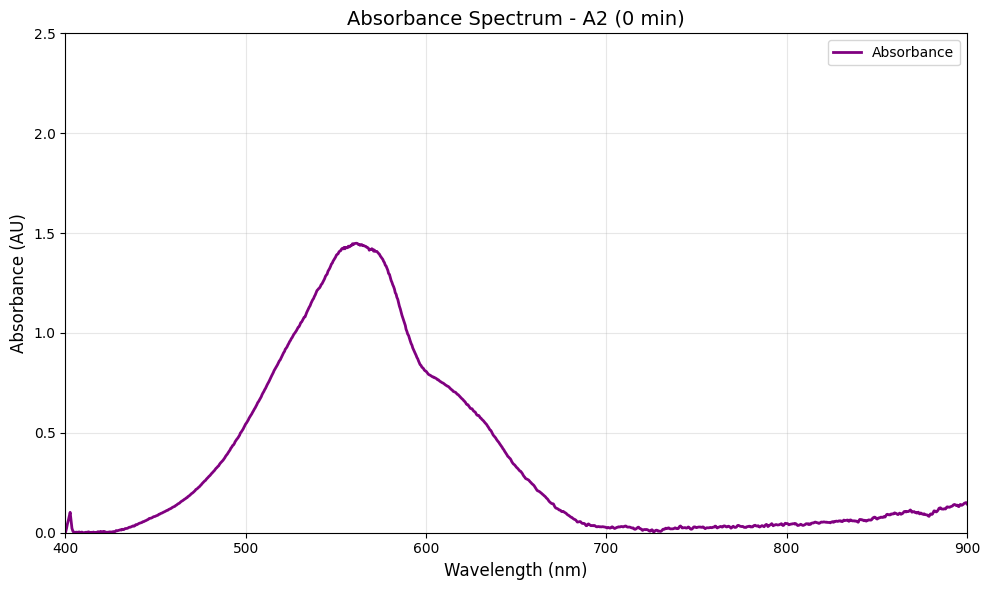

[2025-07-28 19:56:12] Spectrum recorded for vial A2 on Slot 2 at 0 mins

[2025-07-28 19:56:21] Washed Spectrometer Probe

[2025-07-28 19:56:31] Parked Spectrometer 

[2025-07-28 19:56:31] Sleep for 120 seconds

[2025-07-28 19:58:41] Picked Up Dual Syringe

[2025-07-28 19:59:00] Vial A3 on Slot 2 filled with 1.66 ml metal precursor and 1.0375 ml organic precursor

[2025-07-28 19:59:00] Sleep for 10 seconds to let the drops fall off

[2025-07-28 19:59:19] Parked Dual Syringe

[2025-07-28 19:59:29] Picked Up Single Syringe

Error : Well A3 form UWSUNLab 10 Well Plate 14000 µL on slot 2 Well does not have enough liquid to aspirate 3.32 ml liquid volume 
[2025-07-28 20:00:12] Vial A3 on Slot 2 mixed

[2025-07-28 20:00:12] Sleep for 7 seconds to let the drops fall off

[2025-07-28 20:00:28] Parked Single Syringe

[2025-07-28 20:00:38] Picked Up Spectrometer

Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-28\Shuan\ZIF-67 Synthesis - 5 identical vials_Shuan_20250728_192744\spe

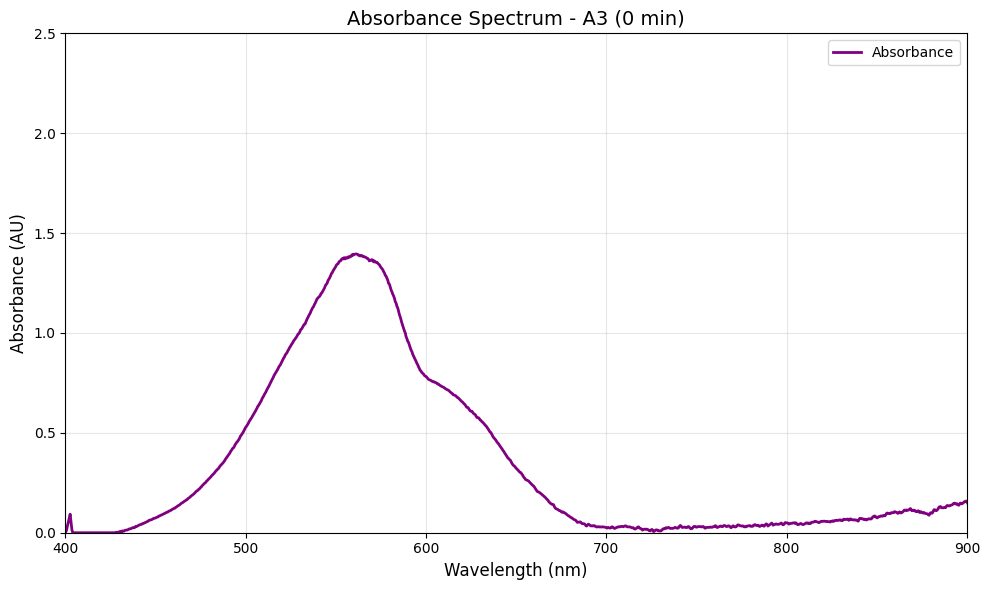

[2025-07-28 20:00:47] Spectrum recorded for vial A3 on Slot 2 at 0 mins

[2025-07-28 20:00:56] Washed Spectrometer Probe

[2025-07-28 20:01:05] Parked Spectrometer 

[2025-07-28 20:01:05] Sleep for 120 seconds

[2025-07-28 20:03:16] Picked Up Dual Syringe

[2025-07-28 20:03:34] Vial A4 on Slot 2 filled with 1.66 ml metal precursor and 1.0375 ml organic precursor

[2025-07-28 20:03:34] Sleep for 10 seconds to let the drops fall off

[2025-07-28 20:03:54] Parked Dual Syringe

[2025-07-28 20:04:04] Picked Up Single Syringe

Error : Well A4 form UWSUNLab 10 Well Plate 14000 µL on slot 2 Well does not have enough liquid to aspirate 3.32 ml liquid volume 
[2025-07-28 20:04:45] Vial A4 on Slot 2 mixed

[2025-07-28 20:04:45] Sleep for 7 seconds to let the drops fall off

[2025-07-28 20:05:01] Parked Single Syringe

[2025-07-28 20:05:10] Picked Up Spectrometer

Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-28\Shuan\ZIF-67 Synthesis - 5 identical vials_Shuan_20250728_192744\spe

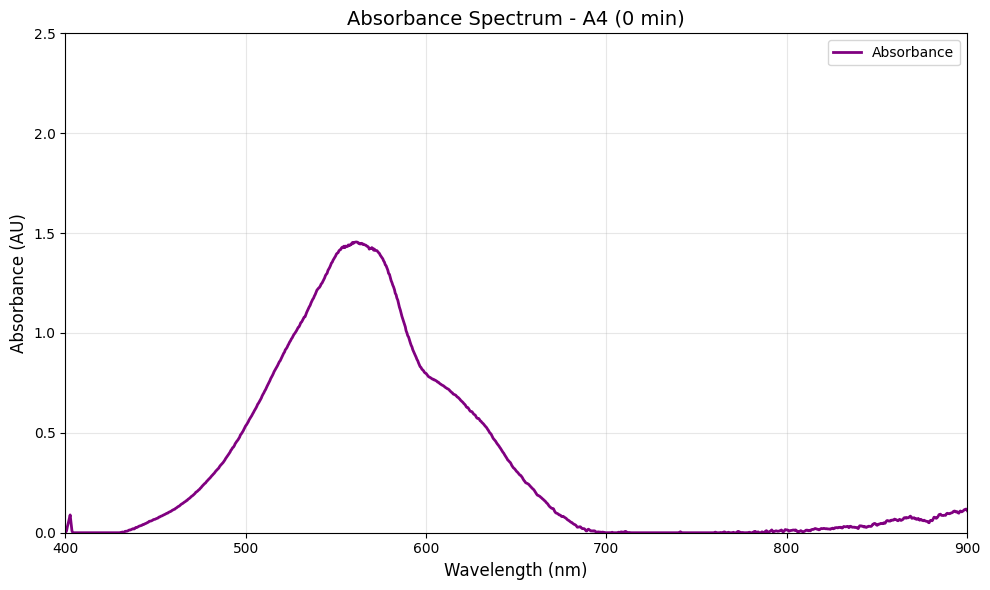

[2025-07-28 20:05:19] Spectrum recorded for vial A4 on Slot 2 at 0 mins

[2025-07-28 20:05:29] Washed Spectrometer Probe

[2025-07-28 20:05:38] Parked Spectrometer 

[2025-07-28 20:05:38] Sleeping for 3 seconds before checking again

[2025-07-28 20:05:41] Sleeping for 3 seconds before checking again

[2025-07-28 20:05:44] Sleeping for 3 seconds before checking again

[2025-07-28 20:05:47] Sleeping for 3 seconds before checking again

[2025-07-28 20:05:50] Sleeping for 3 seconds before checking again

[2025-07-28 20:05:53] Sleeping for 3 seconds before checking again

[2025-07-28 20:05:56] Sleeping for 3 seconds before checking again

[2025-07-28 20:05:59] Sleeping for 3 seconds before checking again

[2025-07-28 20:06:02] Sleeping for 3 seconds before checking again

[2025-07-28 20:06:05] Sleeping for 3 seconds before checking again

[2025-07-28 20:06:08] Sleeping for 3 seconds before checking again

[2025-07-28 20:06:11] Sleeping for 3 seconds before checking again

[2025-07-28 20:06:

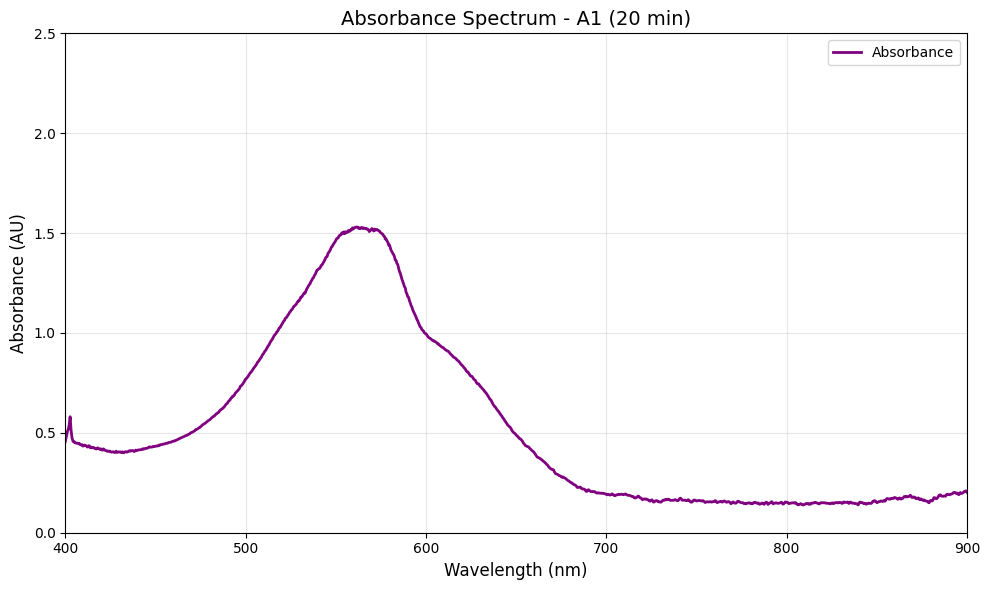

[2025-07-28 20:09:50] Spectrum recorded for vial A1 on Slot 2 at 20 mins

[2025-07-28 20:09:59] Washed Spectrometer Probe

[2025-07-28 20:10:08] Parked Spectrometer 

[2025-07-28 20:10:19] Picked Up Dual Syringe

[2025-07-28 20:10:37] Vial A5 on Slot 2 filled with 1.66 ml metal precursor and 1.0375 ml organic precursor

[2025-07-28 20:10:37] Sleep for 10 seconds to let the drops fall off

[2025-07-28 20:10:57] Parked Dual Syringe

[2025-07-28 20:11:07] Picked Up Single Syringe

Error : Well A5 form UWSUNLab 10 Well Plate 14000 µL on slot 2 Well does not have enough liquid to aspirate 3.32 ml liquid volume 
[2025-07-28 20:11:49] Vial A5 on Slot 2 mixed

[2025-07-28 20:11:49] Sleep for 7 seconds to let the drops fall off

[2025-07-28 20:12:05] Parked Single Syringe

[2025-07-28 20:12:15] Picked Up Spectrometer

Plot saved to: C:\Axo\science-jubilee\axo\spectrum_data\2025-07-28\Shuan\ZIF-67 Synthesis - 5 identical vials_Shuan_20250728_192744\spectra\A5_0min_absorbance.png


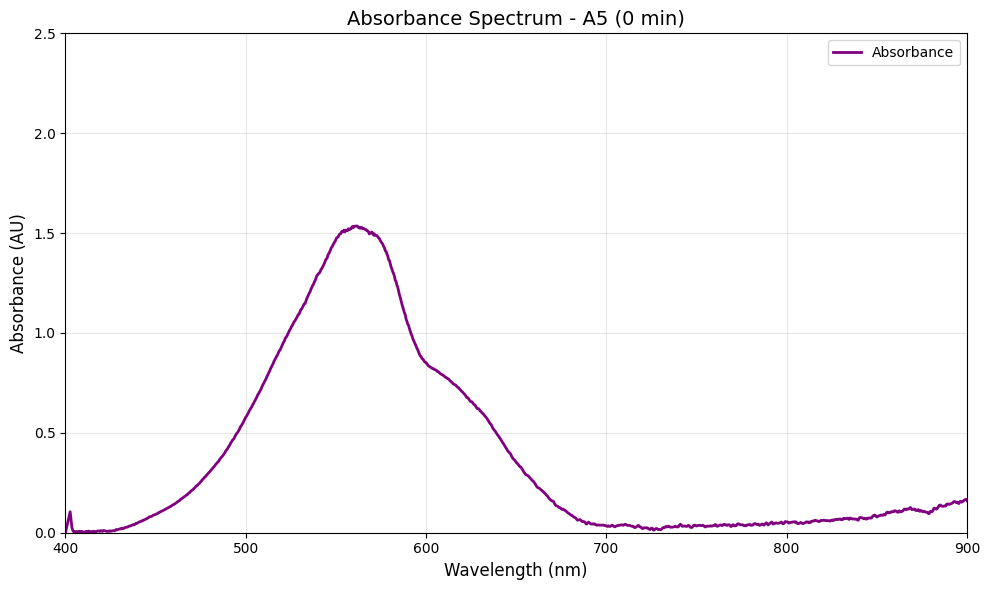

[2025-07-28 20:12:24] Spectrum recorded for vial A5 on Slot 2 at 0 mins

[2025-07-28 20:12:33] Washed Spectrometer Probe

[2025-07-28 20:12:43] Parked Spectrometer 

[2025-07-28 20:12:43] Sleeping for 3 seconds before checking again

[2025-07-28 20:12:46] Sleeping for 3 seconds before checking again

[2025-07-28 20:12:49] Sleeping for 3 seconds before checking again

[2025-07-28 20:12:52] Sleeping for 3 seconds before checking again

[2025-07-28 20:12:55] Sleeping for 3 seconds before checking again

[2025-07-28 20:12:58] Sleeping for 3 seconds before checking again

[2025-07-28 20:13:01] Sleeping for 3 seconds before checking again

[2025-07-28 20:13:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:13:07] Sleeping for 3 seconds before checking again

[2025-07-28 20:13:10] Sleeping for 3 seconds before checking again

[2025-07-28 20:13:13] Sleeping for 3 seconds before checking again

[2025-07-28 20:13:16] Sleeping for 3 seconds before checking again

[2025-07-28 20:13:

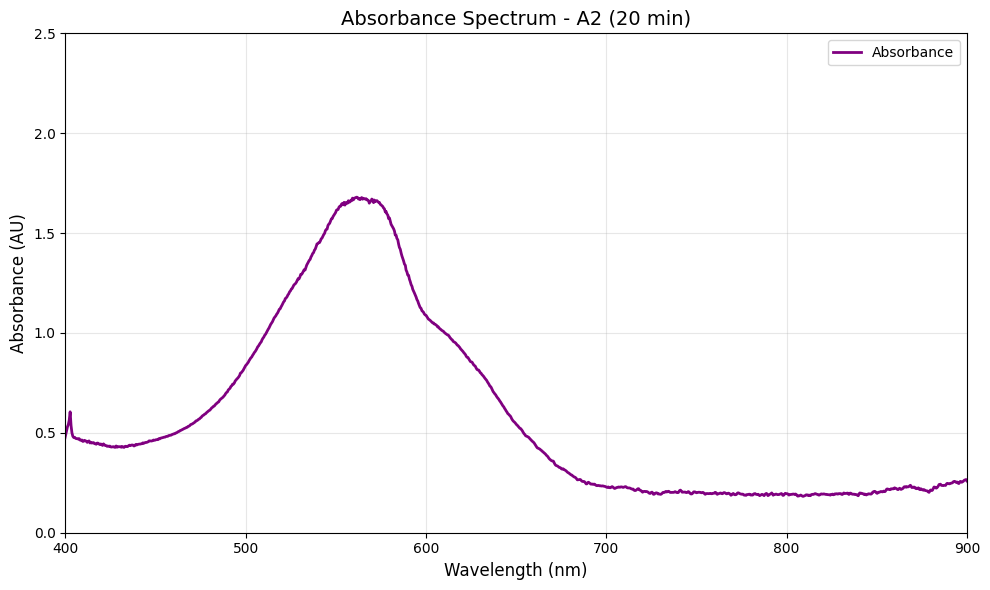

[2025-07-28 20:14:43] Spectrum recorded for vial A2 on Slot 2 at 20 mins

[2025-07-28 20:14:52] Washed Spectrometer Probe

[2025-07-28 20:15:01] Parked Spectrometer 

[2025-07-28 20:15:01] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:07] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:10] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:13] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:16] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:19] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:22] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:25] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:28] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:31] Sleeping for 3 seconds before checking again

[2025-07-28 20:15:34] Sleeping for 3 seconds before checking again

[2025-07-28 20:15

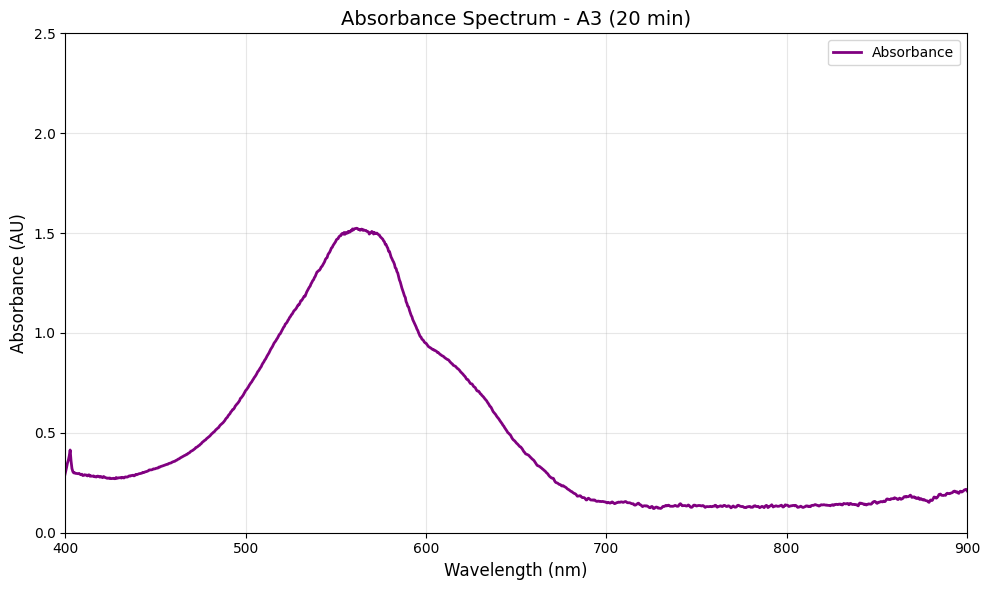

[2025-07-28 20:19:16] Spectrum recorded for vial A3 on Slot 2 at 20 mins

[2025-07-28 20:19:25] Washed Spectrometer Probe

[2025-07-28 20:19:34] Parked Spectrometer 

[2025-07-28 20:19:34] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:37] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:40] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:43] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:46] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:49] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:52] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:55] Sleeping for 3 seconds before checking again

[2025-07-28 20:19:58] Sleeping for 3 seconds before checking again

[2025-07-28 20:20:01] Sleeping for 3 seconds before checking again

[2025-07-28 20:20:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:20:07] Sleeping for 3 seconds before checking again

[2025-07-28 20:20

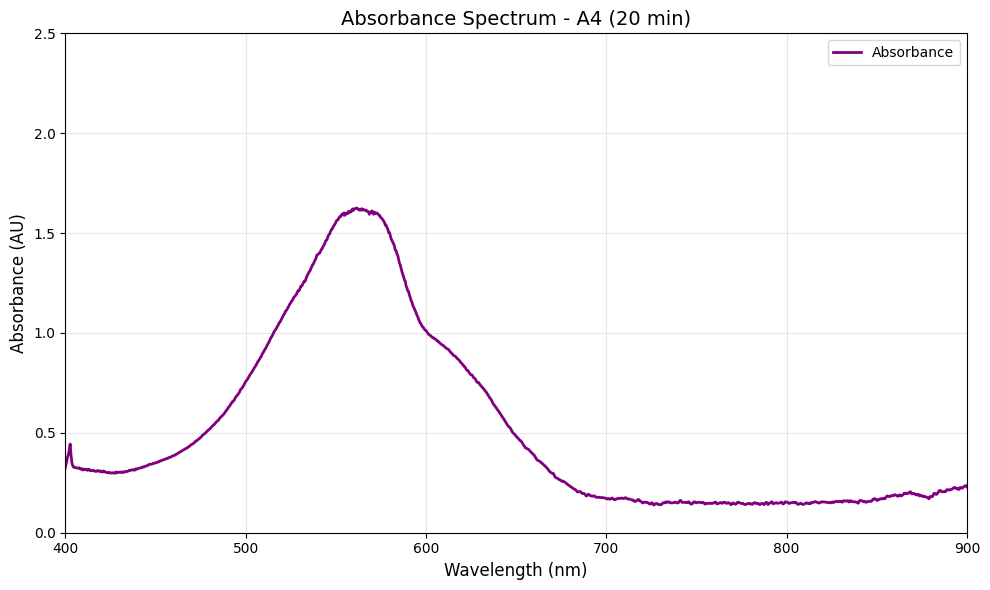

[2025-07-28 20:23:50] Spectrum recorded for vial A4 on Slot 2 at 20 mins

[2025-07-28 20:23:59] Washed Spectrometer Probe

[2025-07-28 20:24:08] Parked Spectrometer 

[2025-07-28 20:24:08] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:11] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:14] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:17] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:20] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:23] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:26] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:29] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:32] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:35] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:38] Sleeping for 3 seconds before checking again

[2025-07-28 20:24:41] Sleeping for 3 seconds before checking again

[2025-07-28 20:24

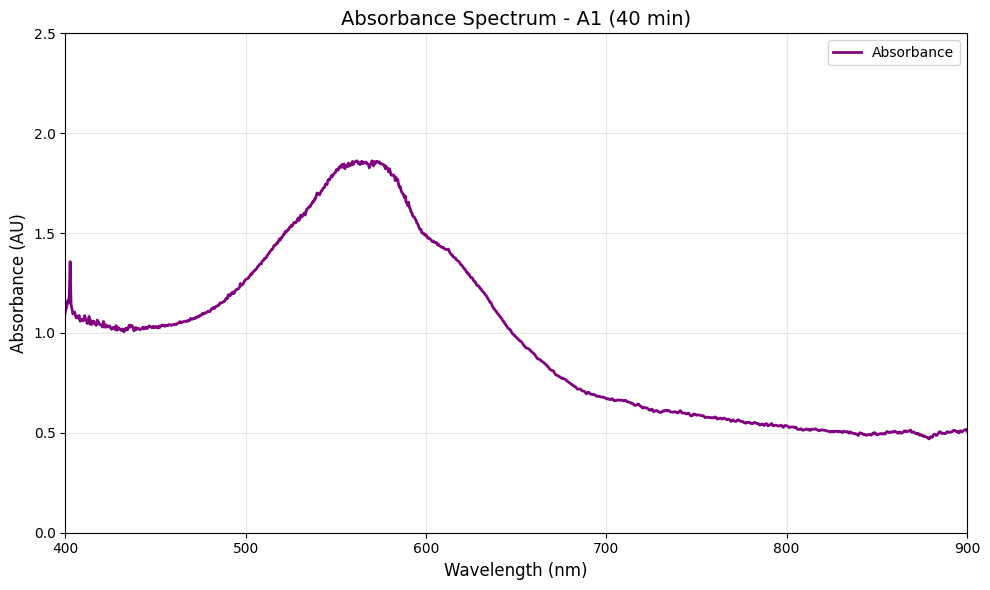

[2025-07-28 20:28:20] Spectrum recorded for vial A1 on Slot 2 at 40 mins

[2025-07-28 20:28:29] Washed Spectrometer Probe

[2025-07-28 20:28:38] Parked Spectrometer 

[2025-07-28 20:28:38] Sleeping for 3 seconds before checking again

[2025-07-28 20:28:41] Sleeping for 3 seconds before checking again

[2025-07-28 20:28:44] Sleeping for 3 seconds before checking again

[2025-07-28 20:28:47] Sleeping for 3 seconds before checking again

[2025-07-28 20:28:50] Sleeping for 3 seconds before checking again

[2025-07-28 20:28:53] Sleeping for 3 seconds before checking again

[2025-07-28 20:28:56] Sleeping for 3 seconds before checking again

[2025-07-28 20:28:59] Sleeping for 3 seconds before checking again

[2025-07-28 20:29:02] Sleeping for 3 seconds before checking again

[2025-07-28 20:29:05] Sleeping for 3 seconds before checking again

[2025-07-28 20:29:08] Sleeping for 3 seconds before checking again

[2025-07-28 20:29:11] Sleeping for 3 seconds before checking again

[2025-07-28 20:29

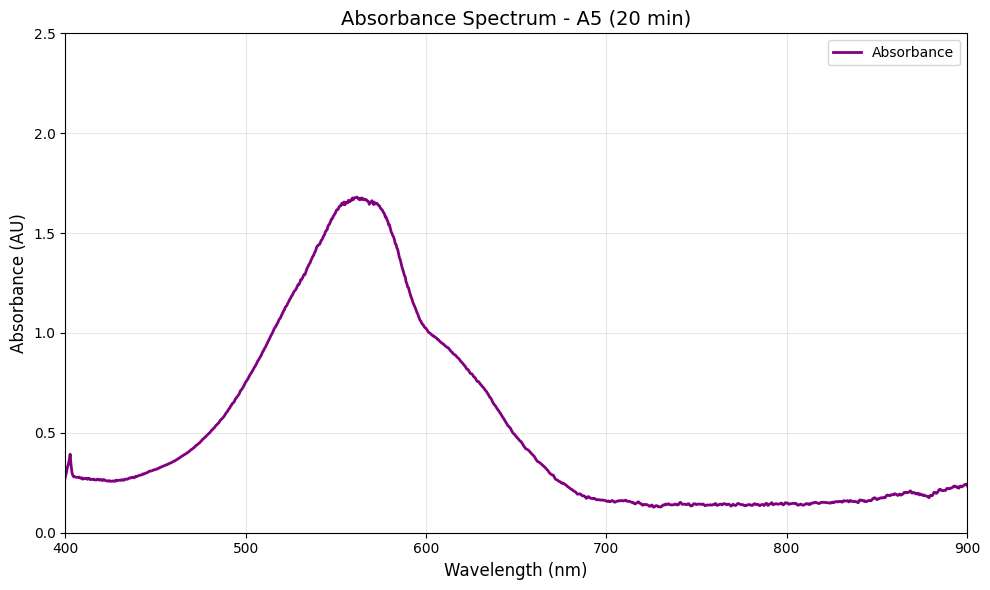

[2025-07-28 20:30:54] Spectrum recorded for vial A5 on Slot 2 at 20 mins

[2025-07-28 20:31:03] Washed Spectrometer Probe

[2025-07-28 20:31:13] Parked Spectrometer 

[2025-07-28 20:31:13] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:16] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:19] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:22] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:25] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:28] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:31] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:34] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:37] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:40] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:43] Sleeping for 3 seconds before checking again

[2025-07-28 20:31:46] Sleeping for 3 seconds before checking again

[2025-07-28 20:31

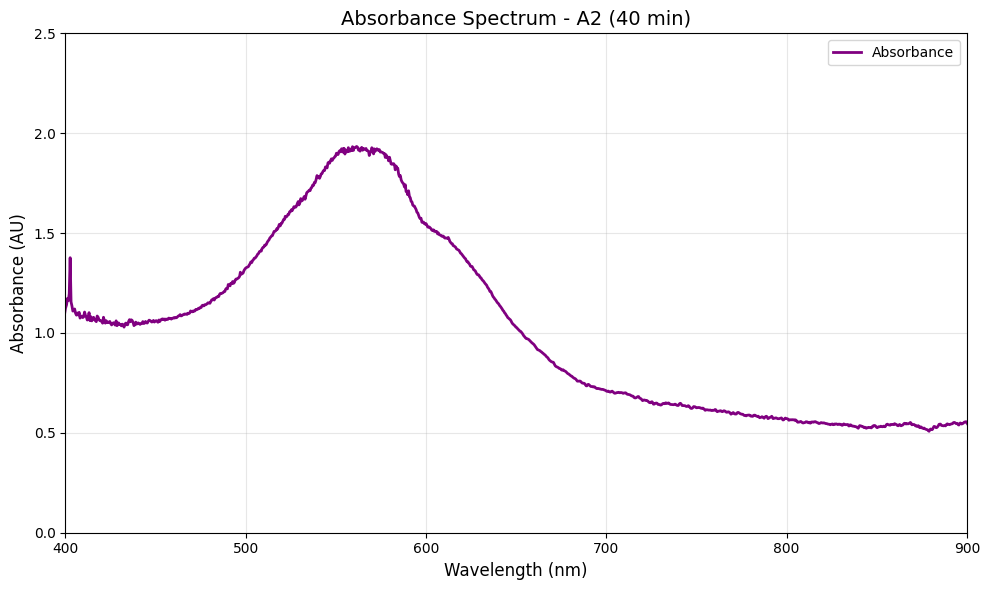

[2025-07-28 20:33:13] Spectrum recorded for vial A2 on Slot 2 at 40 mins

[2025-07-28 20:33:21] Washed Spectrometer Probe

[2025-07-28 20:33:31] Parked Spectrometer 

[2025-07-28 20:33:31] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:34] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:37] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:40] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:43] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:46] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:49] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:52] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:55] Sleeping for 3 seconds before checking again

[2025-07-28 20:33:58] Sleeping for 3 seconds before checking again

[2025-07-28 20:34:01] Sleeping for 3 seconds before checking again

[2025-07-28 20:34:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:34

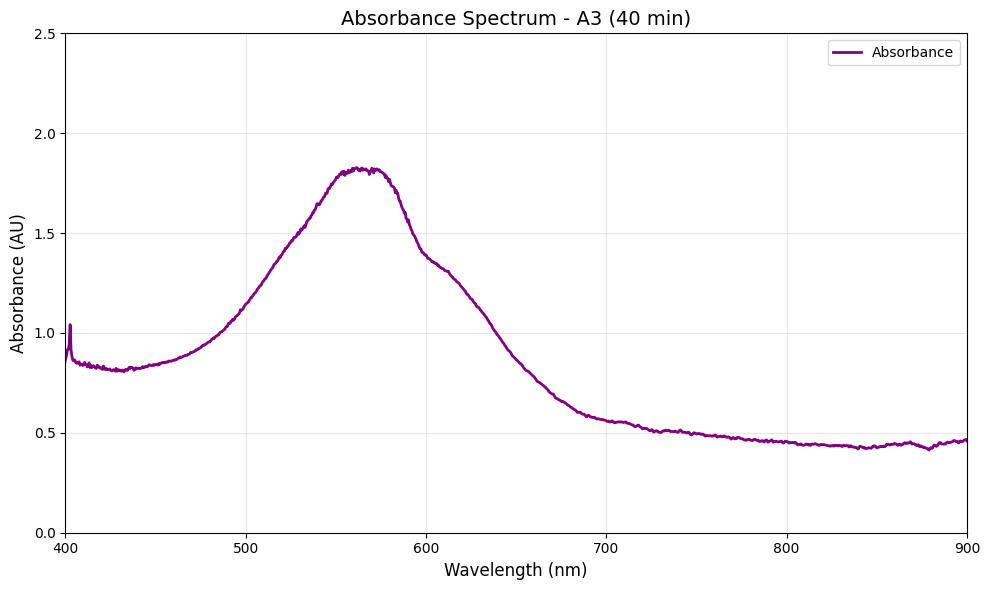

[2025-07-28 20:37:46] Spectrum recorded for vial A3 on Slot 2 at 40 mins

[2025-07-28 20:37:55] Washed Spectrometer Probe

[2025-07-28 20:38:04] Parked Spectrometer 

[2025-07-28 20:38:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:07] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:10] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:13] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:16] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:19] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:22] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:25] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:28] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:31] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:34] Sleeping for 3 seconds before checking again

[2025-07-28 20:38:37] Sleeping for 3 seconds before checking again

[2025-07-28 20:38

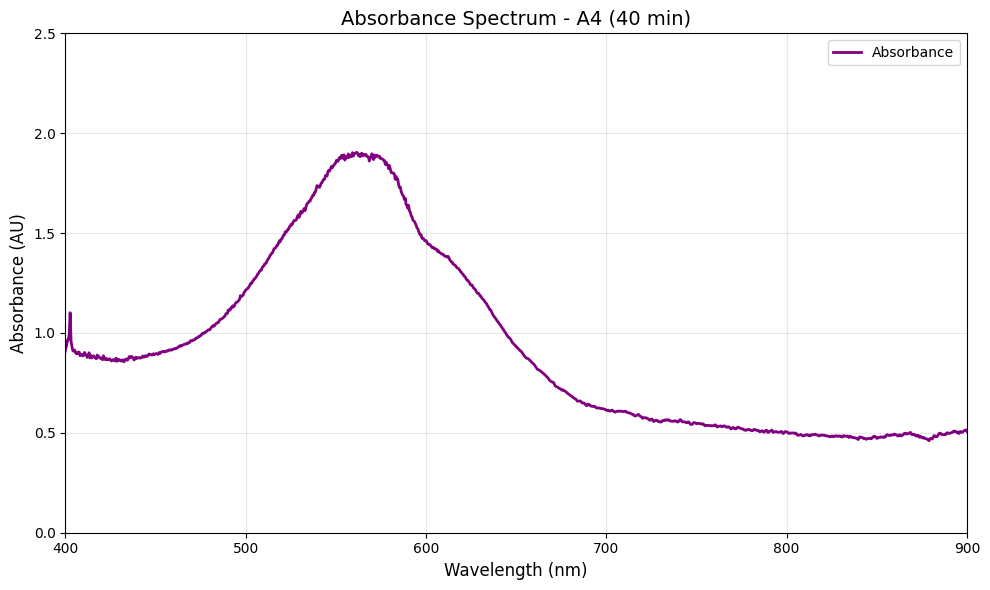

[2025-07-28 20:42:20] Spectrum recorded for vial A4 on Slot 2 at 40 mins

[2025-07-28 20:42:29] Washed Spectrometer Probe

[2025-07-28 20:42:38] Parked Spectrometer 

[2025-07-28 20:42:38] Sleeping for 3 seconds before checking again

[2025-07-28 20:42:41] Sleeping for 3 seconds before checking again

[2025-07-28 20:42:44] Sleeping for 3 seconds before checking again

[2025-07-28 20:42:47] Sleeping for 3 seconds before checking again

[2025-07-28 20:42:50] Sleeping for 3 seconds before checking again

[2025-07-28 20:42:53] Sleeping for 3 seconds before checking again

[2025-07-28 20:42:56] Sleeping for 3 seconds before checking again

[2025-07-28 20:42:59] Sleeping for 3 seconds before checking again

[2025-07-28 20:43:02] Sleeping for 3 seconds before checking again

[2025-07-28 20:43:05] Sleeping for 3 seconds before checking again

[2025-07-28 20:43:08] Sleeping for 3 seconds before checking again

[2025-07-28 20:43:11] Sleeping for 3 seconds before checking again

[2025-07-28 20:43

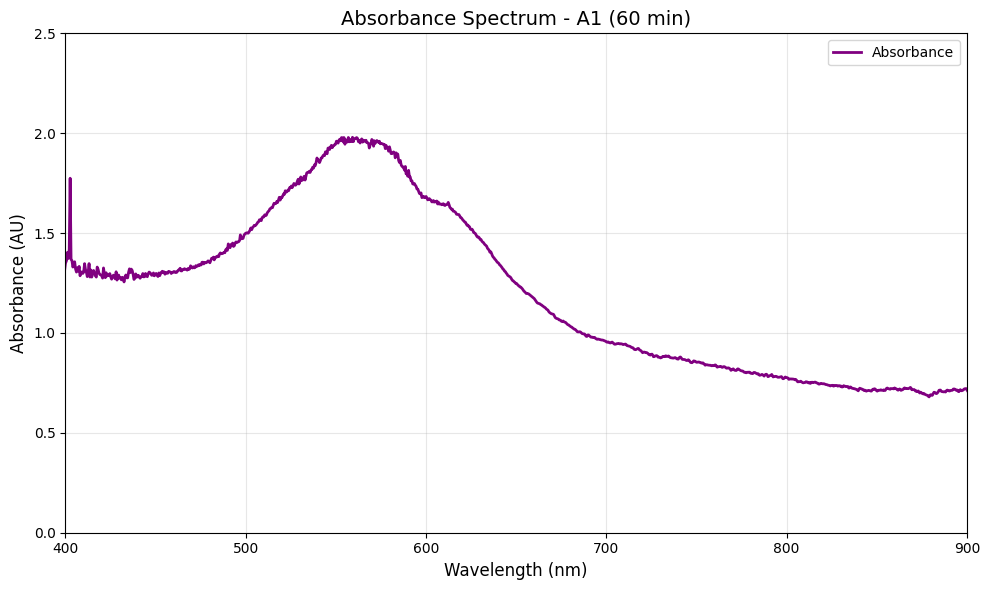

[2025-07-28 20:46:50] Spectrum recorded for vial A1 on Slot 2 at 60 mins

[2025-07-28 20:46:59] Washed Spectrometer Probe

[2025-07-28 20:47:08] Parked Spectrometer 

[2025-07-28 20:47:08] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:11] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:14] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:17] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:20] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:23] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:26] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:29] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:32] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:35] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:38] Sleeping for 3 seconds before checking again

[2025-07-28 20:47:41] Sleeping for 3 seconds before checking again

[2025-07-28 20:47

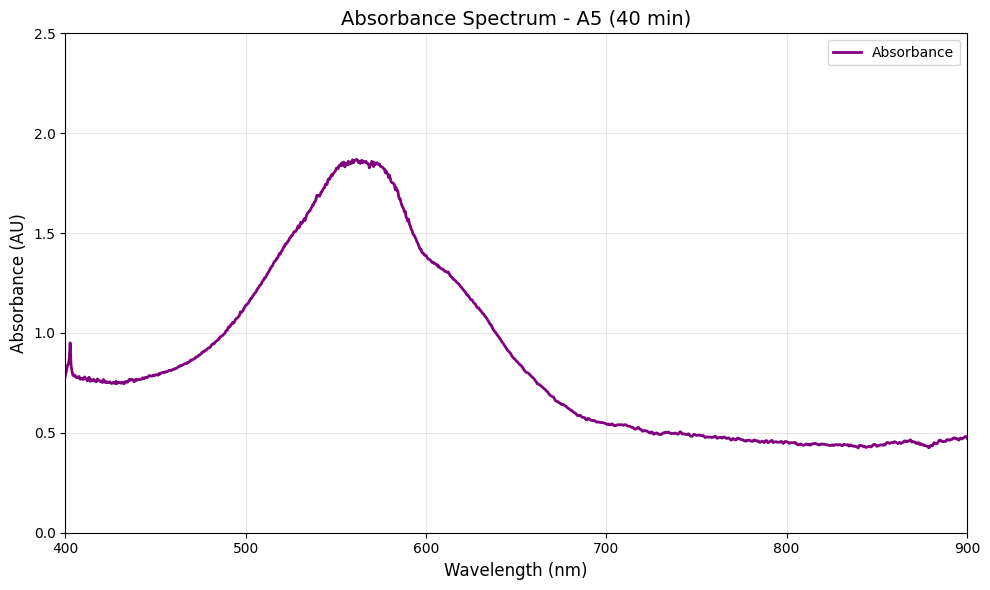

[2025-07-28 20:49:24] Spectrum recorded for vial A5 on Slot 2 at 40 mins

[2025-07-28 20:49:33] Washed Spectrometer Probe

[2025-07-28 20:49:42] Parked Spectrometer 

[2025-07-28 20:49:42] Sleeping for 3 seconds before checking again

[2025-07-28 20:49:45] Sleeping for 3 seconds before checking again

[2025-07-28 20:49:48] Sleeping for 3 seconds before checking again

[2025-07-28 20:49:51] Sleeping for 3 seconds before checking again

[2025-07-28 20:49:54] Sleeping for 3 seconds before checking again

[2025-07-28 20:49:57] Sleeping for 3 seconds before checking again

[2025-07-28 20:50:01] Sleeping for 3 seconds before checking again

[2025-07-28 20:50:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:50:07] Sleeping for 3 seconds before checking again

[2025-07-28 20:50:10] Sleeping for 3 seconds before checking again

[2025-07-28 20:50:13] Sleeping for 3 seconds before checking again

[2025-07-28 20:50:16] Sleeping for 3 seconds before checking again

[2025-07-28 20:50

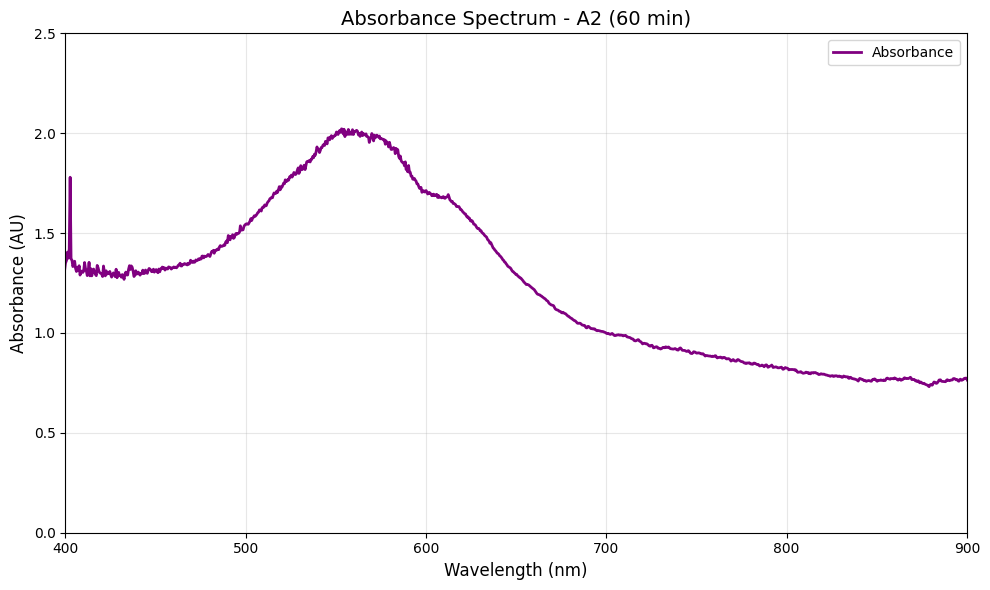

[2025-07-28 20:51:43] Spectrum recorded for vial A2 on Slot 2 at 60 mins

[2025-07-28 20:51:51] Washed Spectrometer Probe

[2025-07-28 20:52:01] Parked Spectrometer 

[2025-07-28 20:52:01] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:07] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:10] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:13] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:16] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:19] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:22] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:25] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:28] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:31] Sleeping for 3 seconds before checking again

[2025-07-28 20:52:34] Sleeping for 3 seconds before checking again

[2025-07-28 20:52

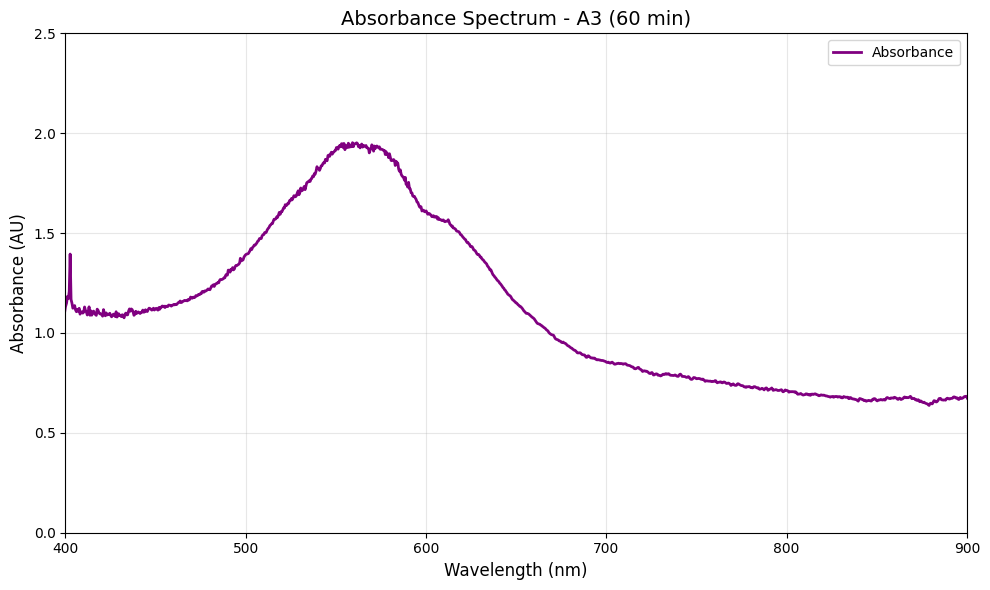

[2025-07-28 20:56:16] Spectrum recorded for vial A3 on Slot 2 at 60 mins

[2025-07-28 20:56:25] Washed Spectrometer Probe

[2025-07-28 20:56:34] Parked Spectrometer 

[2025-07-28 20:56:34] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:37] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:40] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:43] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:46] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:49] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:52] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:55] Sleeping for 3 seconds before checking again

[2025-07-28 20:56:58] Sleeping for 3 seconds before checking again

[2025-07-28 20:57:01] Sleeping for 3 seconds before checking again

[2025-07-28 20:57:04] Sleeping for 3 seconds before checking again

[2025-07-28 20:57:07] Sleeping for 3 seconds before checking again

[2025-07-28 20:57

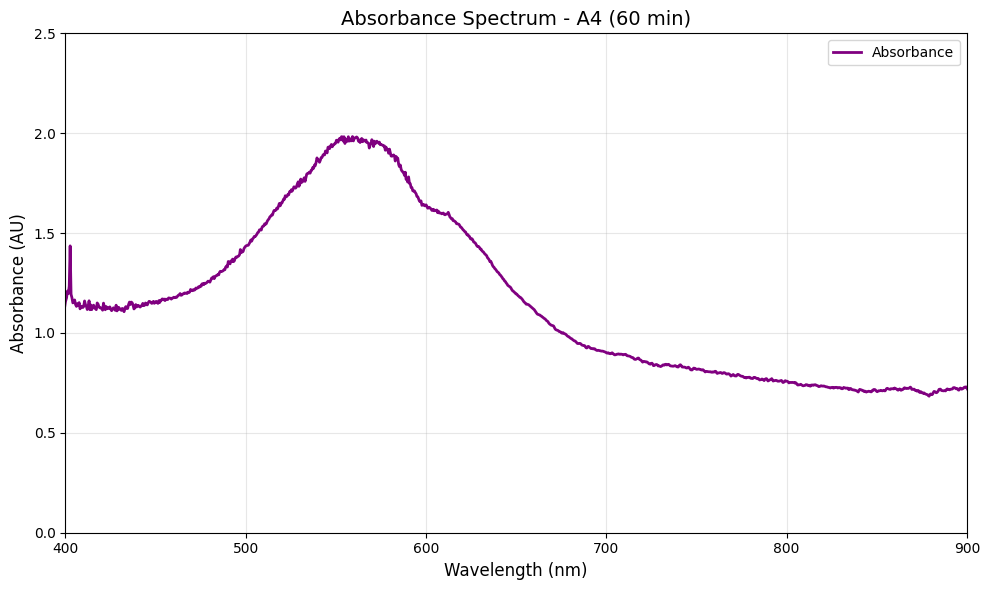

[2025-07-28 21:00:50] Spectrum recorded for vial A4 on Slot 2 at 60 mins

[2025-07-28 21:00:59] Washed Spectrometer Probe

[2025-07-28 21:01:08] Parked Spectrometer 

[2025-07-28 21:01:08] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:11] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:14] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:17] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:20] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:23] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:26] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:29] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:32] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:35] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:38] Sleeping for 3 seconds before checking again

[2025-07-28 21:01:41] Sleeping for 3 seconds before checking again

[2025-07-28 21:01

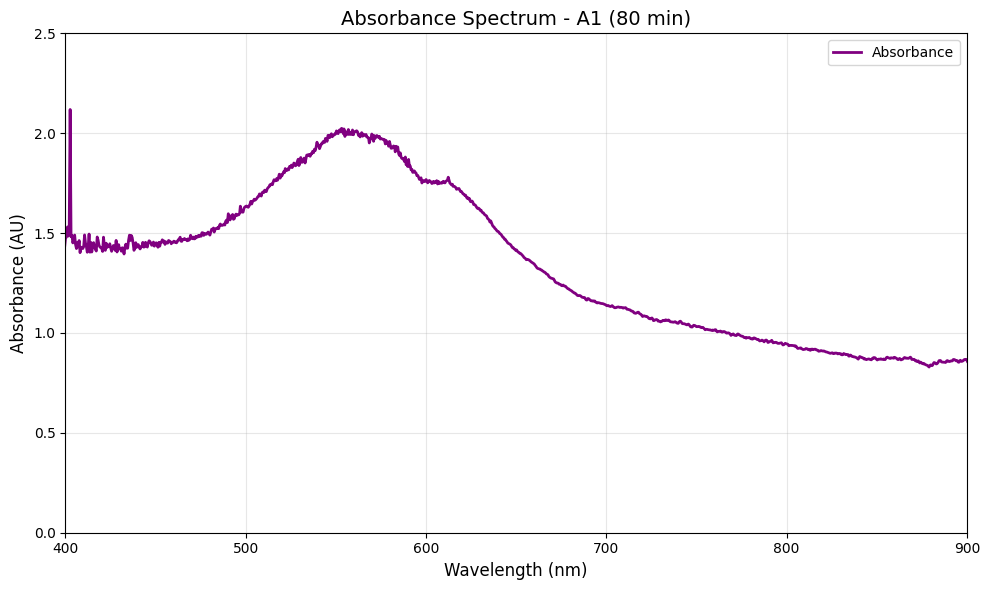

[2025-07-28 21:05:20] Spectrum recorded for vial A1 on Slot 2 at 80 mins

[2025-07-28 21:05:29] Washed Spectrometer Probe

[2025-07-28 21:05:38] Parked Spectrometer 

[2025-07-28 21:05:38] Sleeping for 3 seconds before checking again

[2025-07-28 21:05:41] Sleeping for 3 seconds before checking again

[2025-07-28 21:05:44] Sleeping for 3 seconds before checking again

[2025-07-28 21:05:47] Sleeping for 3 seconds before checking again

[2025-07-28 21:05:50] Sleeping for 3 seconds before checking again

[2025-07-28 21:05:53] Sleeping for 3 seconds before checking again

[2025-07-28 21:05:56] Sleeping for 3 seconds before checking again

[2025-07-28 21:05:59] Sleeping for 3 seconds before checking again

[2025-07-28 21:06:02] Sleeping for 3 seconds before checking again

[2025-07-28 21:06:05] Sleeping for 3 seconds before checking again

[2025-07-28 21:06:08] Sleeping for 3 seconds before checking again

[2025-07-28 21:06:11] Sleeping for 3 seconds before checking again

[2025-07-28 21:06

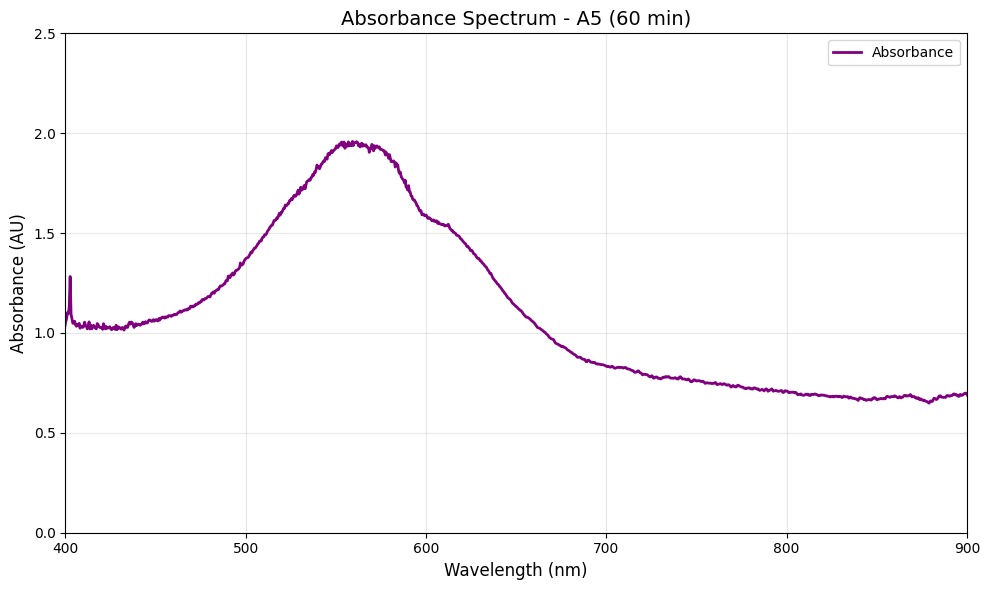

[2025-07-28 21:07:54] Spectrum recorded for vial A5 on Slot 2 at 60 mins

[2025-07-28 21:08:03] Washed Spectrometer Probe

[2025-07-28 21:08:12] Parked Spectrometer 

[2025-07-28 21:08:12] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:15] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:18] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:21] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:24] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:27] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:30] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:33] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:36] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:40] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:43] Sleeping for 3 seconds before checking again

[2025-07-28 21:08:46] Sleeping for 3 seconds before checking again

[2025-07-28 21:08

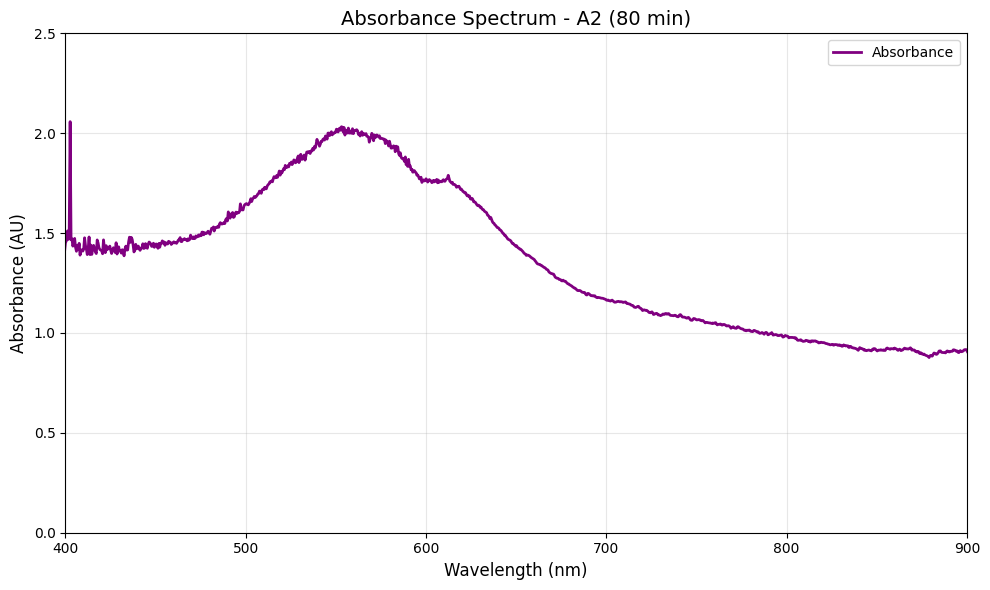

[2025-07-28 21:10:13] Spectrum recorded for vial A2 on Slot 2 at 80 mins

[2025-07-28 21:10:21] Washed Spectrometer Probe

[2025-07-28 21:10:31] Parked Spectrometer 

[2025-07-28 21:10:31] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:34] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:37] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:40] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:43] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:46] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:49] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:52] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:55] Sleeping for 3 seconds before checking again

[2025-07-28 21:10:58] Sleeping for 3 seconds before checking again

[2025-07-28 21:11:01] Sleeping for 3 seconds before checking again

[2025-07-28 21:11:04] Sleeping for 3 seconds before checking again

[2025-07-28 21:11

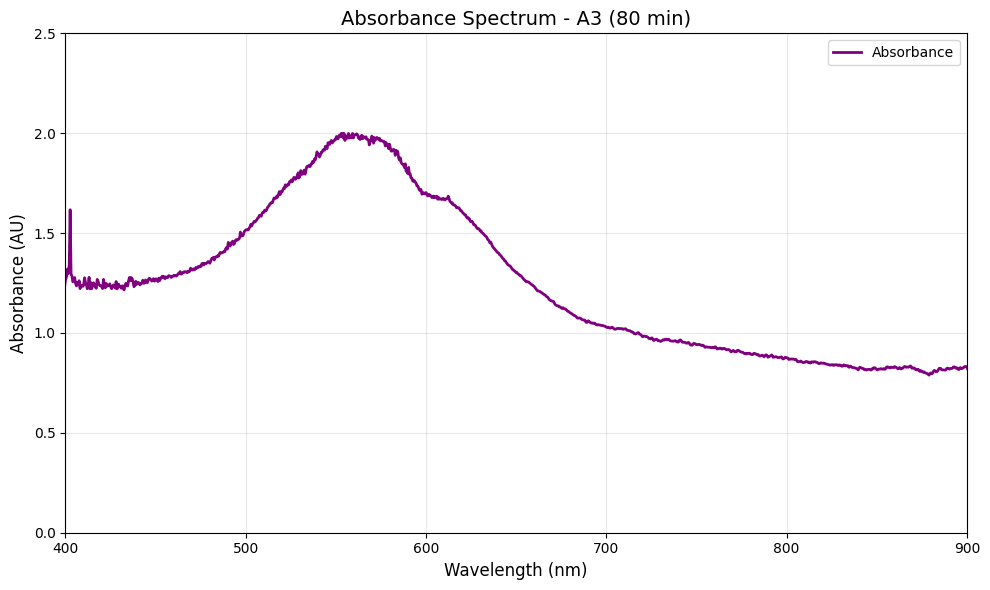

[2025-07-28 21:14:46] Spectrum recorded for vial A3 on Slot 2 at 80 mins

[2025-07-28 21:14:55] Washed Spectrometer Probe

[2025-07-28 21:15:04] Parked Spectrometer 

[2025-07-28 21:15:04] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:07] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:10] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:13] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:16] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:19] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:22] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:25] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:28] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:31] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:34] Sleeping for 3 seconds before checking again

[2025-07-28 21:15:37] Sleeping for 3 seconds before checking again

[2025-07-28 21:15

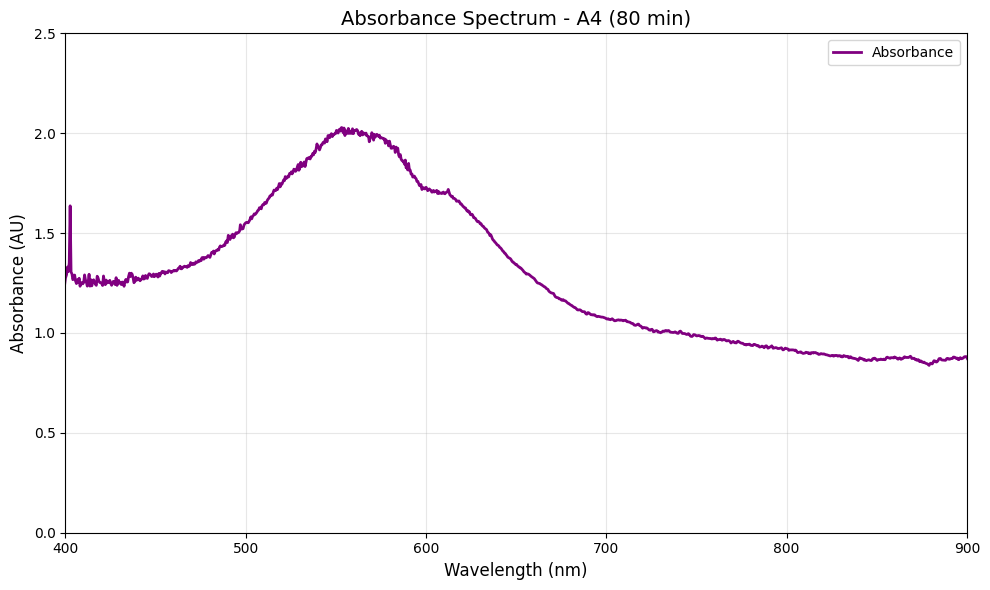

[2025-07-28 21:19:20] Spectrum recorded for vial A4 on Slot 2 at 80 mins

[2025-07-28 21:19:29] Washed Spectrometer Probe

[2025-07-28 21:19:38] Parked Spectrometer 

[2025-07-28 21:19:38] Sleeping for 3 seconds before checking again

[2025-07-28 21:19:41] Sleeping for 3 seconds before checking again

[2025-07-28 21:19:44] Sleeping for 3 seconds before checking again

[2025-07-28 21:19:47] Sleeping for 3 seconds before checking again

[2025-07-28 21:19:50] Sleeping for 3 seconds before checking again

[2025-07-28 21:19:53] Sleeping for 3 seconds before checking again

[2025-07-28 21:19:56] Sleeping for 3 seconds before checking again

[2025-07-28 21:19:59] Sleeping for 3 seconds before checking again

[2025-07-28 21:20:02] Sleeping for 3 seconds before checking again

[2025-07-28 21:20:05] Sleeping for 3 seconds before checking again

[2025-07-28 21:20:08] Sleeping for 3 seconds before checking again

[2025-07-28 21:20:11] Sleeping for 3 seconds before checking again

[2025-07-28 21:20

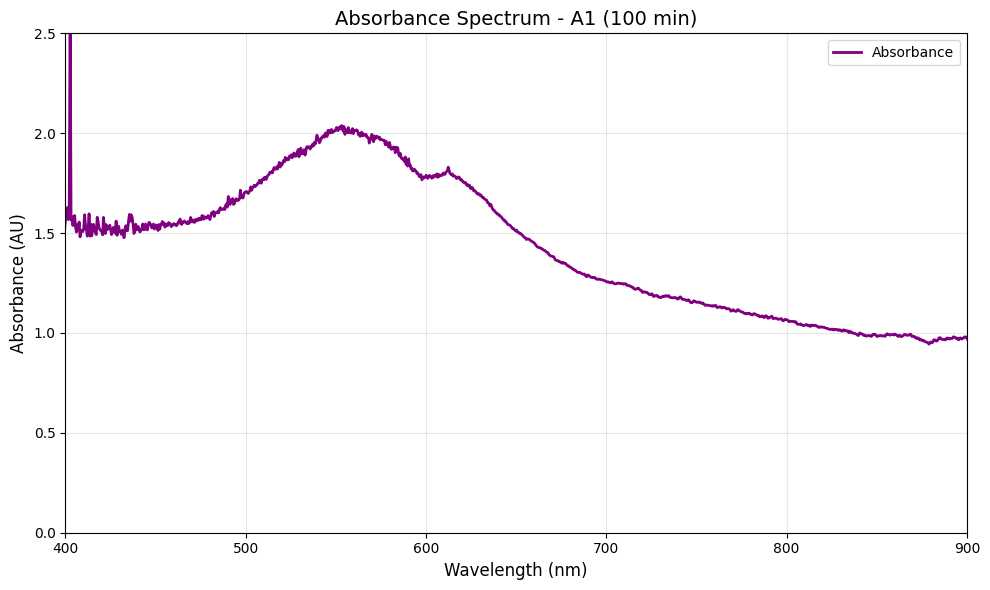

[2025-07-28 21:23:50] Spectrum recorded for vial A1 on Slot 2 at 100 mins

[2025-07-28 21:23:59] Washed Spectrometer Probe

[2025-07-28 21:24:08] Parked Spectrometer 

[2025-07-28 21:24:08] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:11] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:14] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:17] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:20] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:23] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:26] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:29] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:32] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:35] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:38] Sleeping for 3 seconds before checking again

[2025-07-28 21:24:41] Sleeping for 3 seconds before checking again

[2025-07-28 21:2

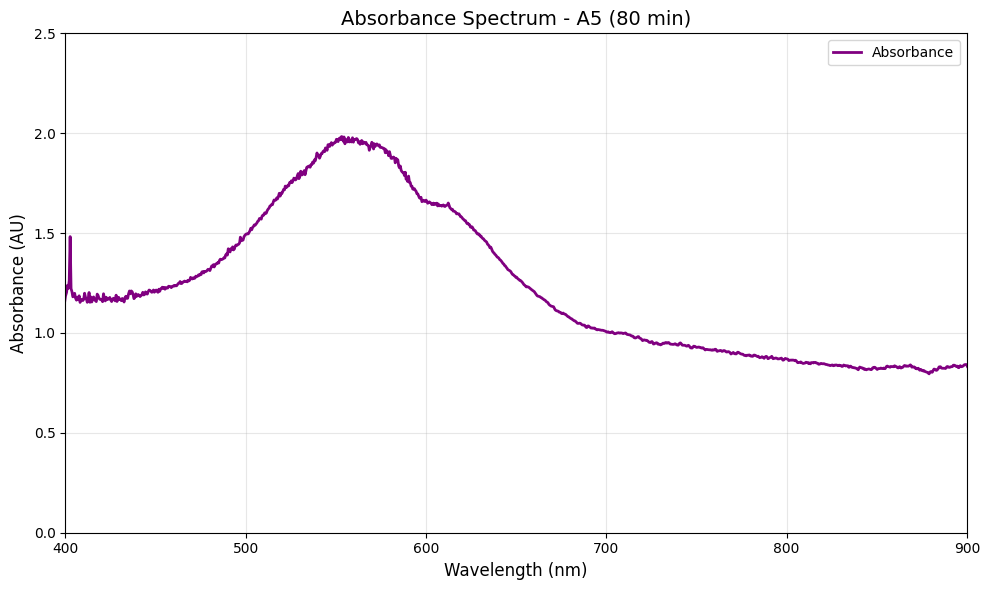

[2025-07-28 21:26:24] Spectrum recorded for vial A5 on Slot 2 at 80 mins

[2025-07-28 21:26:33] Washed Spectrometer Probe

[2025-07-28 21:26:43] Parked Spectrometer 

[2025-07-28 21:26:43] Sleeping for 3 seconds before checking again

[2025-07-28 21:26:46] Sleeping for 3 seconds before checking again

[2025-07-28 21:26:49] Sleeping for 3 seconds before checking again

[2025-07-28 21:26:52] Sleeping for 3 seconds before checking again

[2025-07-28 21:26:55] Sleeping for 3 seconds before checking again

[2025-07-28 21:26:58] Sleeping for 3 seconds before checking again

[2025-07-28 21:27:01] Sleeping for 3 seconds before checking again

[2025-07-28 21:27:04] Sleeping for 3 seconds before checking again

[2025-07-28 21:27:07] Sleeping for 3 seconds before checking again

[2025-07-28 21:27:10] Sleeping for 3 seconds before checking again

[2025-07-28 21:27:13] Sleeping for 3 seconds before checking again

[2025-07-28 21:27:16] Sleeping for 3 seconds before checking again

[2025-07-28 21:27

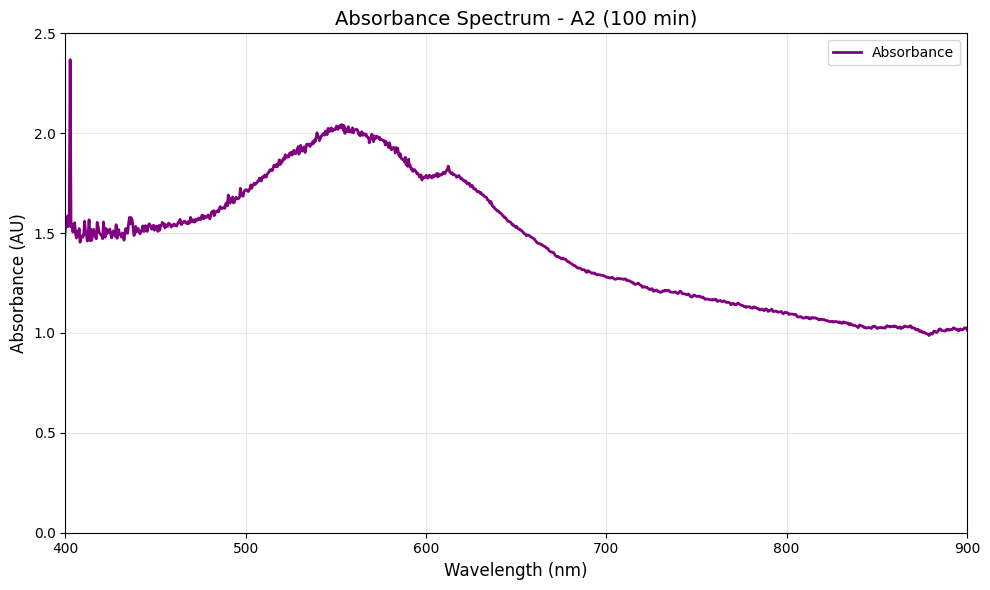

[2025-07-28 21:28:43] Spectrum recorded for vial A2 on Slot 2 at 100 mins

[2025-07-28 21:28:51] Washed Spectrometer Probe

[2025-07-28 21:29:01] Parked Spectrometer 

[2025-07-28 21:29:01] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:04] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:07] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:10] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:13] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:16] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:19] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:22] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:25] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:28] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:31] Sleeping for 3 seconds before checking again

[2025-07-28 21:29:34] Sleeping for 3 seconds before checking again

[2025-07-28 21:2

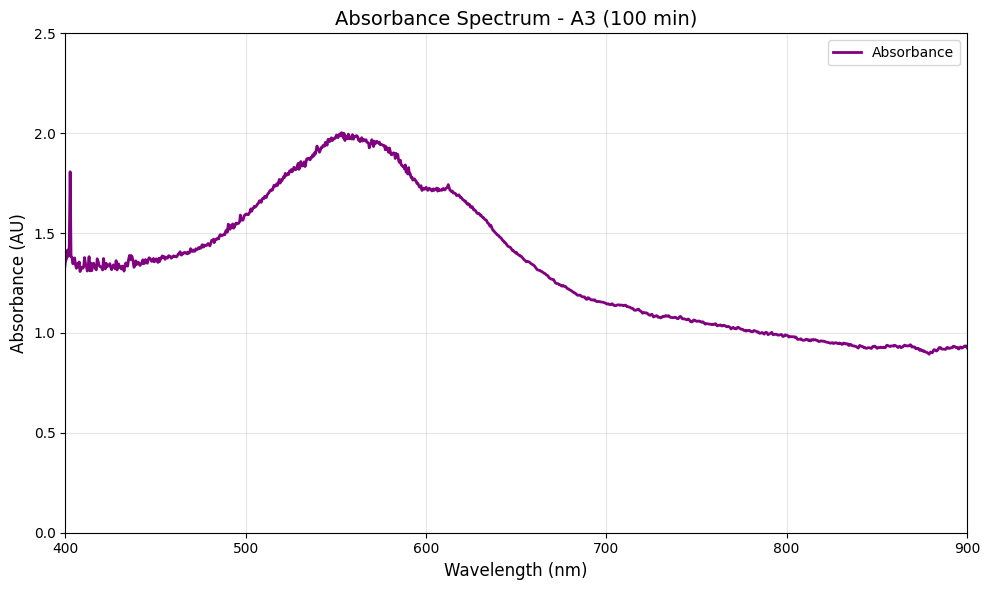

[2025-07-28 21:33:16] Spectrum recorded for vial A3 on Slot 2 at 100 mins

[2025-07-28 21:33:25] Washed Spectrometer Probe

[2025-07-28 21:33:34] Parked Spectrometer 

[2025-07-28 21:33:34] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:37] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:40] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:43] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:46] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:49] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:52] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:55] Sleeping for 3 seconds before checking again

[2025-07-28 21:33:58] Sleeping for 3 seconds before checking again

[2025-07-28 21:34:01] Sleeping for 3 seconds before checking again

[2025-07-28 21:34:04] Sleeping for 3 seconds before checking again

[2025-07-28 21:34:07] Sleeping for 3 seconds before checking again

[2025-07-28 21:3

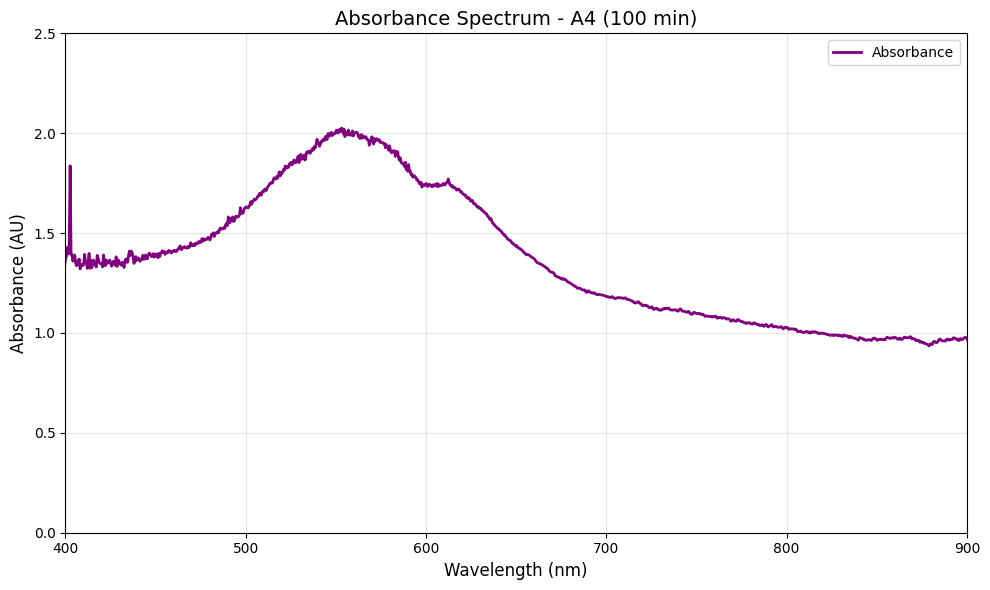

[2025-07-28 21:37:50] Spectrum recorded for vial A4 on Slot 2 at 100 mins

[2025-07-28 21:37:59] Washed Spectrometer Probe

[2025-07-28 21:38:08] Parked Spectrometer 

[2025-07-28 21:38:08] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:11] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:14] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:17] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:20] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:23] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:26] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:29] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:32] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:35] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:38] Sleeping for 3 seconds before checking again

[2025-07-28 21:38:41] Sleeping for 3 seconds before checking again

[2025-07-28 21:3

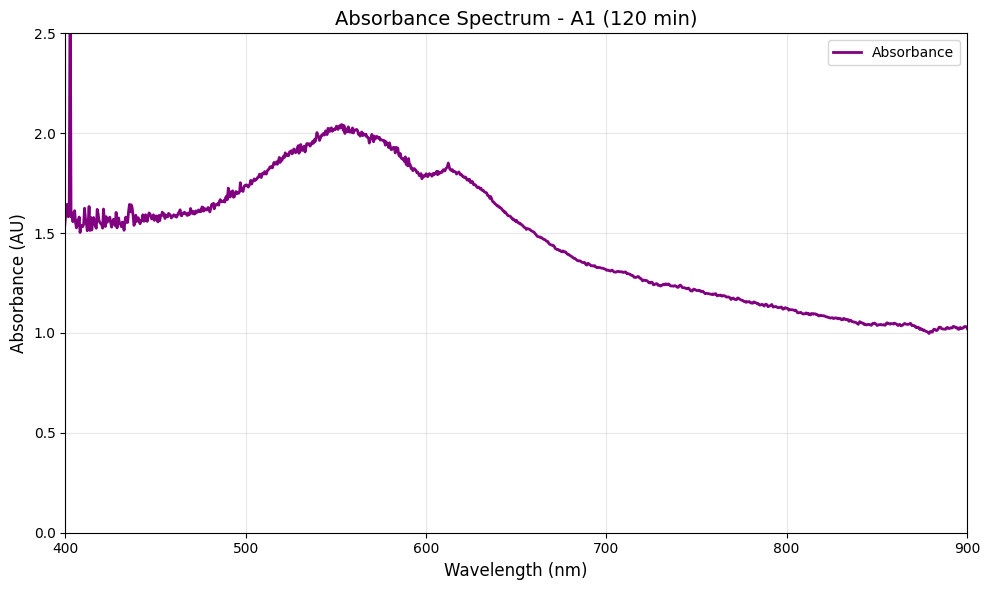

[2025-07-28 21:42:20] Spectrum recorded for vial A1 on Slot 2 at 120 mins

[2025-07-28 21:42:29] Washed Spectrometer Probe

[2025-07-28 21:42:38] Parked Spectrometer 

[2025-07-28 21:42:38] Sleeping for 3 seconds before checking again

[2025-07-28 21:42:41] Sleeping for 3 seconds before checking again

[2025-07-28 21:42:44] Sleeping for 3 seconds before checking again

[2025-07-28 21:42:47] Sleeping for 3 seconds before checking again

[2025-07-28 21:42:50] Sleeping for 3 seconds before checking again

[2025-07-28 21:42:53] Sleeping for 3 seconds before checking again

[2025-07-28 21:42:56] Sleeping for 3 seconds before checking again

[2025-07-28 21:42:59] Sleeping for 3 seconds before checking again

[2025-07-28 21:43:02] Sleeping for 3 seconds before checking again

[2025-07-28 21:43:05] Sleeping for 3 seconds before checking again

[2025-07-28 21:43:08] Sleeping for 3 seconds before checking again

[2025-07-28 21:43:11] Sleeping for 3 seconds before checking again

[2025-07-28 21:4

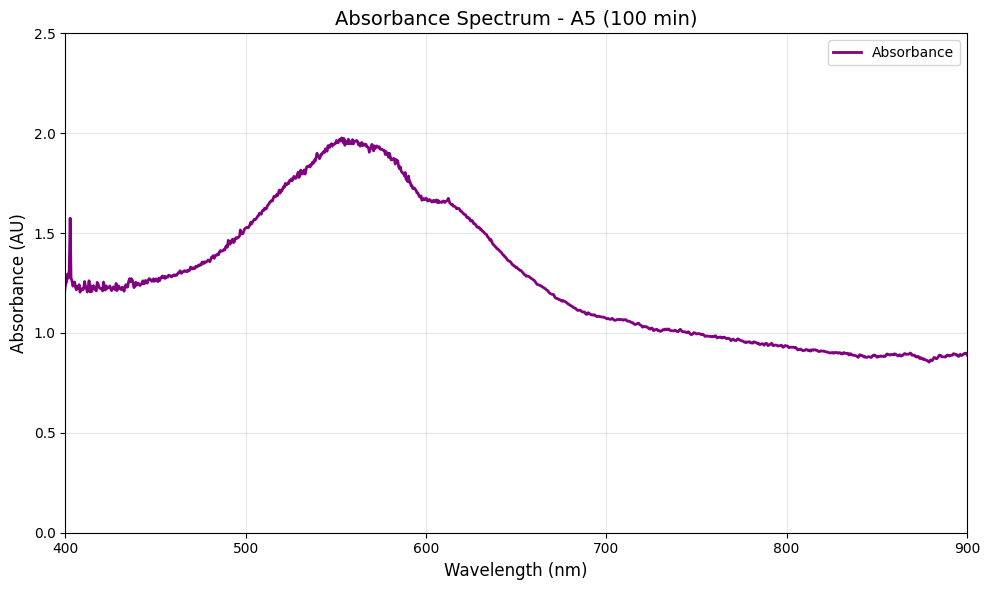

[2025-07-28 21:44:54] Spectrum recorded for vial A5 on Slot 2 at 100 mins

[2025-07-28 21:45:03] Washed Spectrometer Probe

[2025-07-28 21:45:12] Parked Spectrometer 

[2025-07-28 21:45:12] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:15] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:18] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:21] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:25] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:28] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:31] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:34] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:37] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:40] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:43] Sleeping for 3 seconds before checking again

[2025-07-28 21:45:46] Sleeping for 3 seconds before checking again

[2025-07-28 21:4

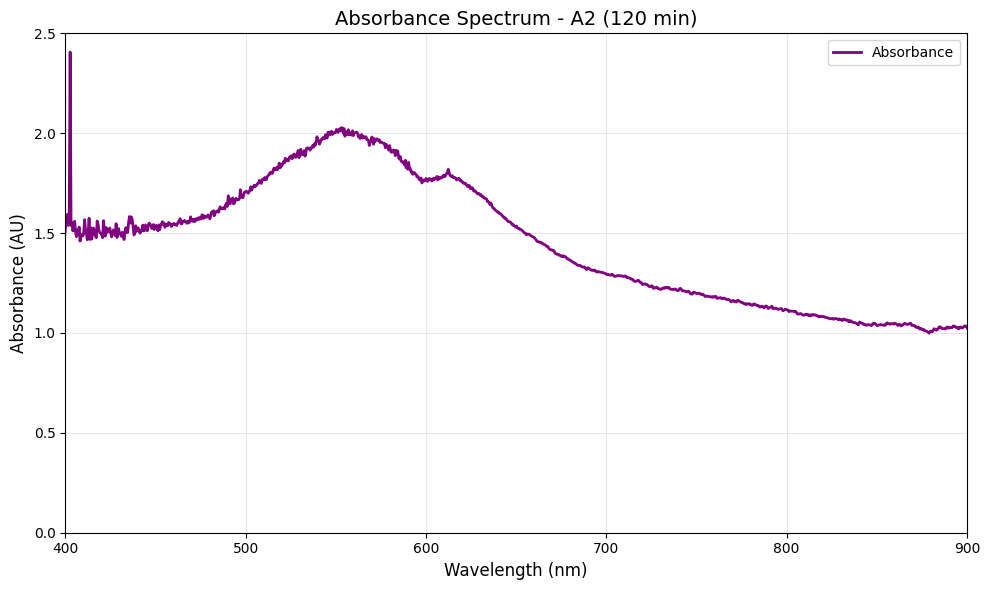

[2025-07-28 21:47:13] Spectrum recorded for vial A2 on Slot 2 at 120 mins

[2025-07-28 21:47:21] Washed Spectrometer Probe

[2025-07-28 21:47:31] Parked Spectrometer 

[2025-07-28 21:47:31] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:34] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:37] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:40] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:43] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:46] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:49] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:52] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:55] Sleeping for 3 seconds before checking again

[2025-07-28 21:47:58] Sleeping for 3 seconds before checking again

[2025-07-28 21:48:01] Sleeping for 3 seconds before checking again

[2025-07-28 21:48:04] Sleeping for 3 seconds before checking again

[2025-07-28 21:4

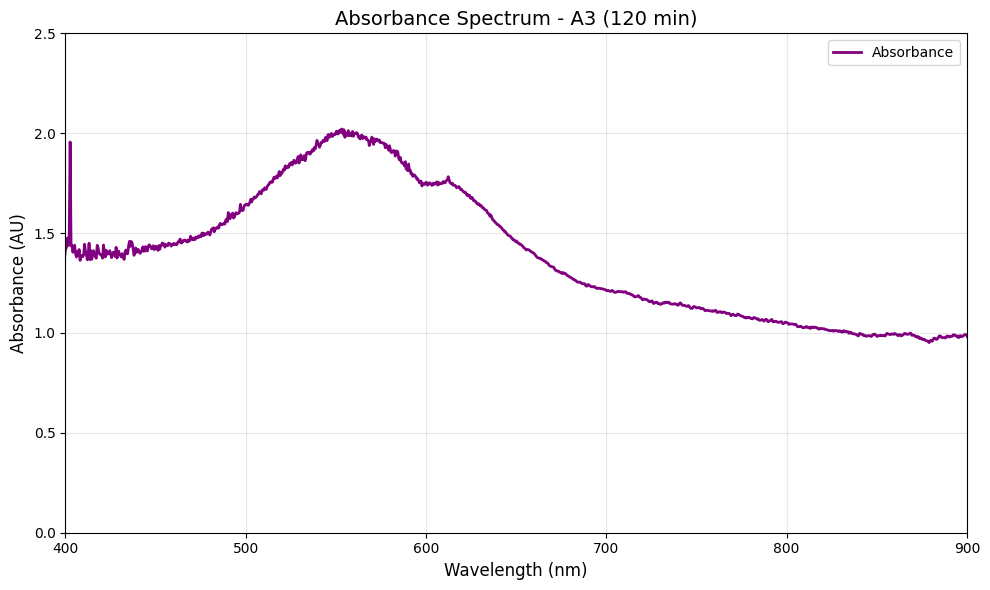

[2025-07-28 21:51:46] Spectrum recorded for vial A3 on Slot 2 at 120 mins

[2025-07-28 21:51:55] Washed Spectrometer Probe

[2025-07-28 21:52:04] Parked Spectrometer 

[2025-07-28 21:52:04] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:07] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:10] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:13] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:16] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:19] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:22] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:25] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:28] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:31] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:34] Sleeping for 3 seconds before checking again

[2025-07-28 21:52:37] Sleeping for 3 seconds before checking again

[2025-07-28 21:5

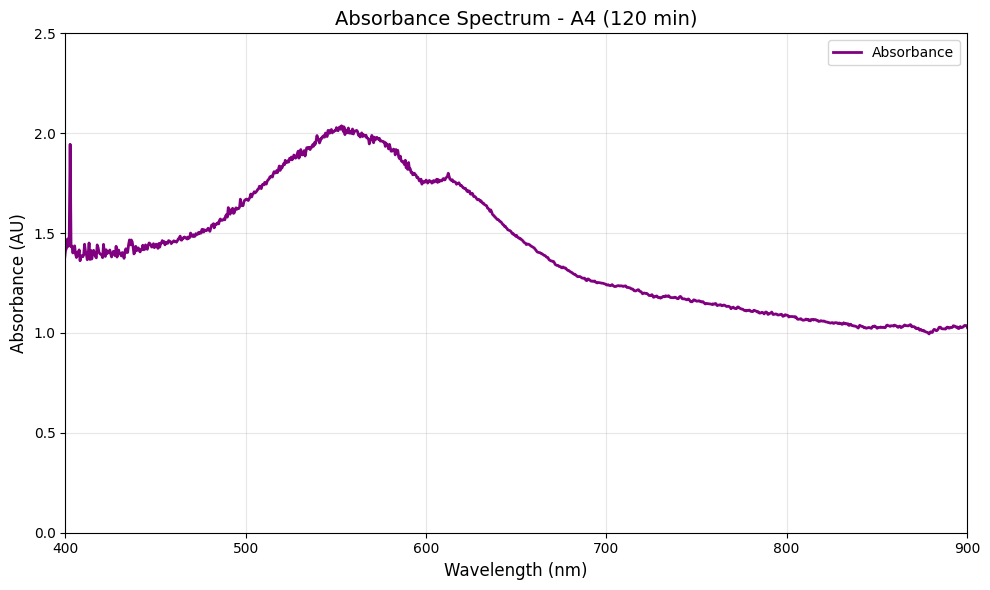

[2025-07-28 21:56:20] Spectrum recorded for vial A4 on Slot 2 at 120 mins

[2025-07-28 21:56:29] Washed Spectrometer Probe

[2025-07-28 21:56:38] Parked Spectrometer 

[2025-07-28 21:56:38] Sleeping for 3 seconds before checking again

[2025-07-28 21:56:41] Sleeping for 3 seconds before checking again

[2025-07-28 21:56:44] Sleeping for 3 seconds before checking again

[2025-07-28 21:56:47] Sleeping for 3 seconds before checking again

[2025-07-28 21:56:50] Sleeping for 3 seconds before checking again

[2025-07-28 21:56:53] Sleeping for 3 seconds before checking again

[2025-07-28 21:56:56] Sleeping for 3 seconds before checking again

[2025-07-28 21:56:59] Sleeping for 3 seconds before checking again

[2025-07-28 21:57:02] Sleeping for 3 seconds before checking again

[2025-07-28 21:57:05] Sleeping for 3 seconds before checking again

[2025-07-28 21:57:08] Sleeping for 3 seconds before checking again

[2025-07-28 21:57:11] Sleeping for 3 seconds before checking again

[2025-07-28 21:5

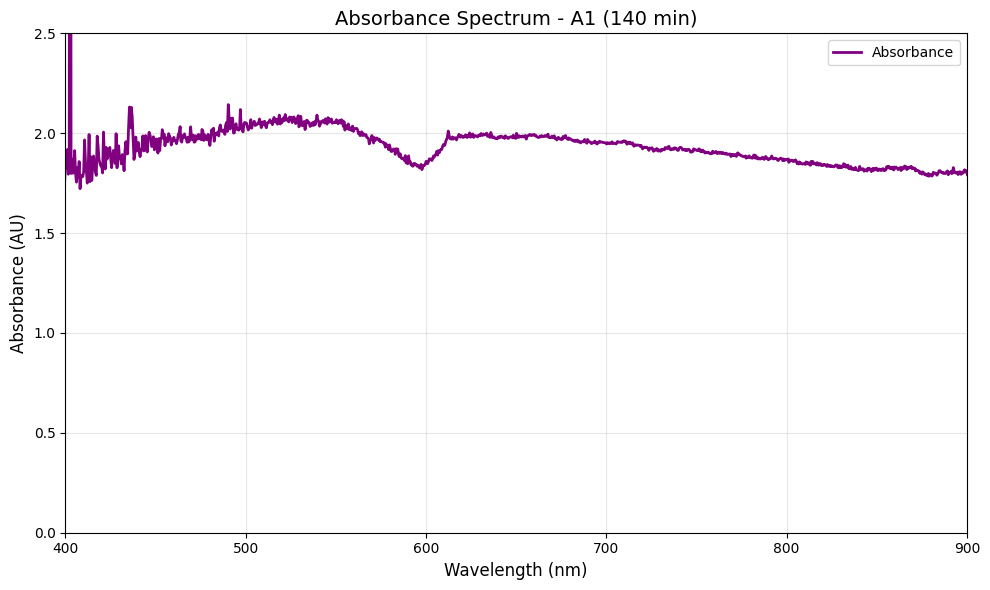

[2025-07-28 22:00:50] Spectrum recorded for vial A1 on Slot 2 at 140 mins

[2025-07-28 22:00:59] Washed Spectrometer Probe

[2025-07-28 22:01:08] Parked Spectrometer 

[2025-07-28 22:01:08] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:11] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:14] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:17] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:20] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:23] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:26] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:29] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:32] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:35] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:38] Sleeping for 3 seconds before checking again

[2025-07-28 22:01:41] Sleeping for 3 seconds before checking again

[2025-07-28 22:0

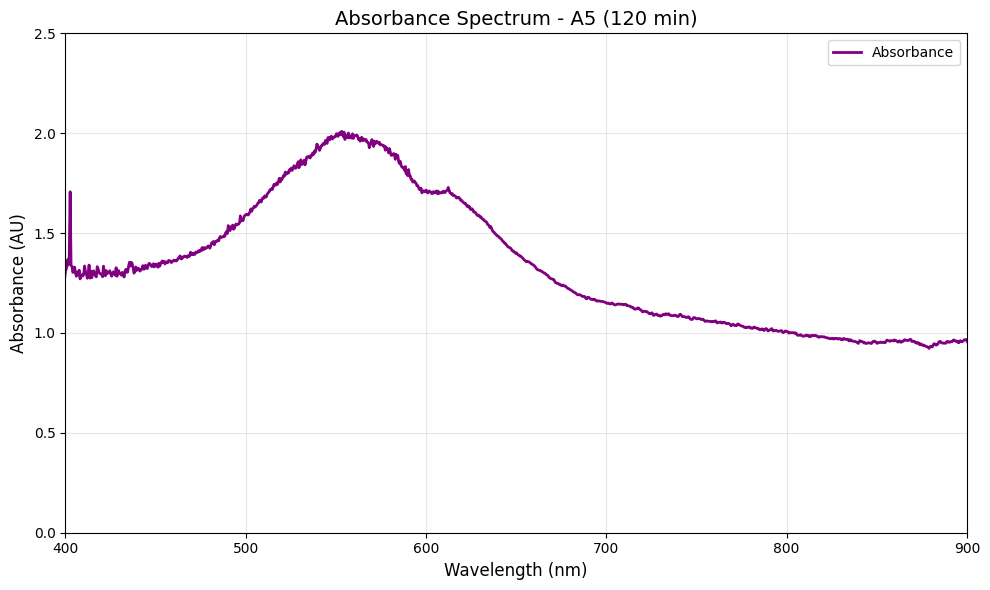

[2025-07-28 22:03:24] Spectrum recorded for vial A5 on Slot 2 at 120 mins

[2025-07-28 22:03:33] Washed Spectrometer Probe

[2025-07-28 22:03:43] Parked Spectrometer 

[2025-07-28 22:03:43] Sleeping for 3 seconds before checking again

[2025-07-28 22:03:46] Sleeping for 3 seconds before checking again

[2025-07-28 22:03:49] Sleeping for 3 seconds before checking again

[2025-07-28 22:03:52] Sleeping for 3 seconds before checking again

[2025-07-28 22:03:55] Sleeping for 3 seconds before checking again

[2025-07-28 22:03:58] Sleeping for 3 seconds before checking again

[2025-07-28 22:04:01] Sleeping for 3 seconds before checking again

[2025-07-28 22:04:04] Sleeping for 3 seconds before checking again

[2025-07-28 22:04:07] Sleeping for 3 seconds before checking again

[2025-07-28 22:04:10] Sleeping for 3 seconds before checking again

[2025-07-28 22:04:13] Sleeping for 3 seconds before checking again

[2025-07-28 22:04:16] Sleeping for 3 seconds before checking again

[2025-07-28 22:0

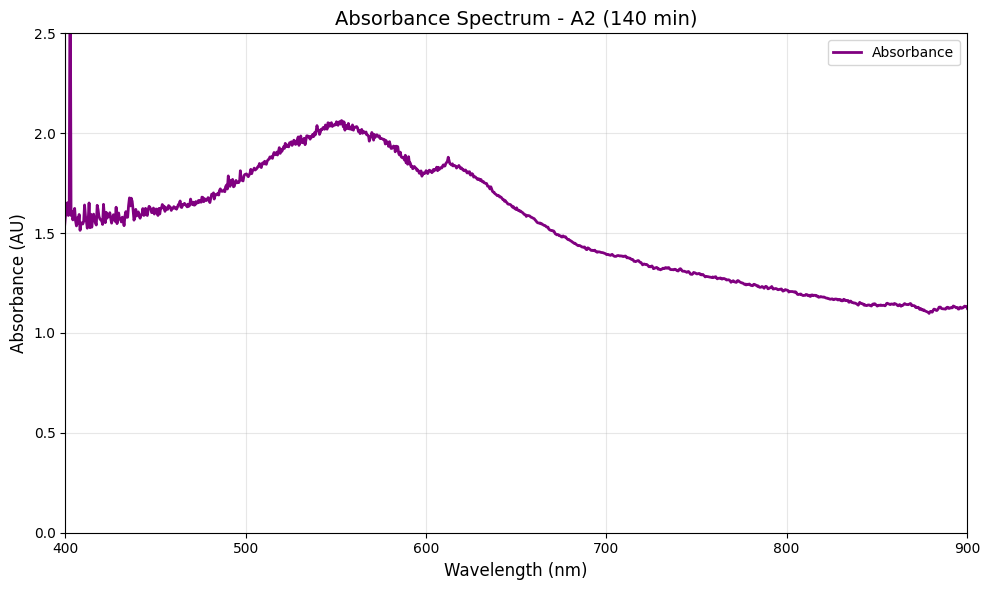

[2025-07-28 22:05:43] Spectrum recorded for vial A2 on Slot 2 at 140 mins

[2025-07-28 22:05:51] Washed Spectrometer Probe

[2025-07-28 22:06:01] Parked Spectrometer 

[2025-07-28 22:06:01] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:04] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:07] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:10] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:13] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:16] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:19] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:22] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:25] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:28] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:31] Sleeping for 3 seconds before checking again

[2025-07-28 22:06:34] Sleeping for 3 seconds before checking again

[2025-07-28 22:0

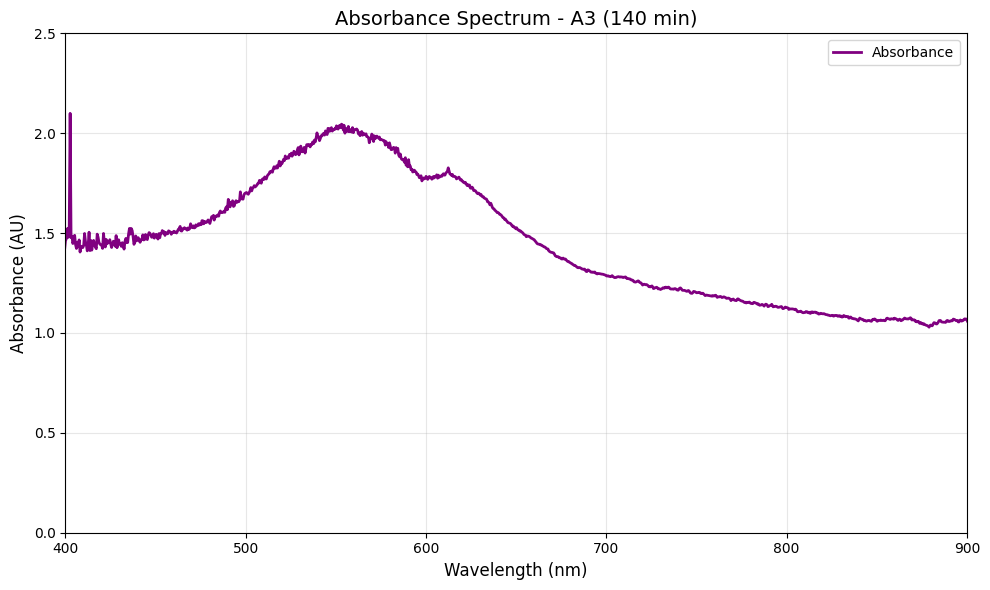

[2025-07-28 22:10:16] Spectrum recorded for vial A3 on Slot 2 at 140 mins

[2025-07-28 22:10:25] Washed Spectrometer Probe

[2025-07-28 22:10:34] Parked Spectrometer 

[2025-07-28 22:10:34] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:37] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:40] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:43] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:46] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:49] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:52] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:55] Sleeping for 3 seconds before checking again

[2025-07-28 22:10:58] Sleeping for 3 seconds before checking again

[2025-07-28 22:11:01] Sleeping for 3 seconds before checking again

[2025-07-28 22:11:04] Sleeping for 3 seconds before checking again

[2025-07-28 22:11:07] Sleeping for 3 seconds before checking again

[2025-07-28 22:1

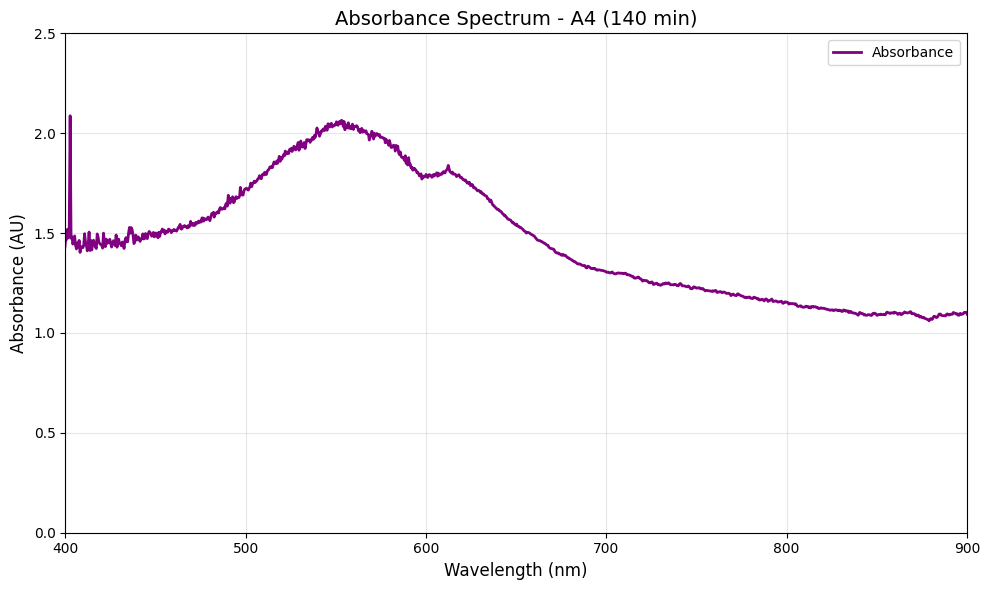

[2025-07-28 22:14:50] Spectrum recorded for vial A4 on Slot 2 at 140 mins

[2025-07-28 22:14:59] Washed Spectrometer Probe

[2025-07-28 22:15:08] Parked Spectrometer 

[2025-07-28 22:15:08] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:11] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:14] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:17] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:20] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:23] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:26] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:29] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:32] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:35] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:38] Sleeping for 3 seconds before checking again

[2025-07-28 22:15:41] Sleeping for 3 seconds before checking again

[2025-07-28 22:1

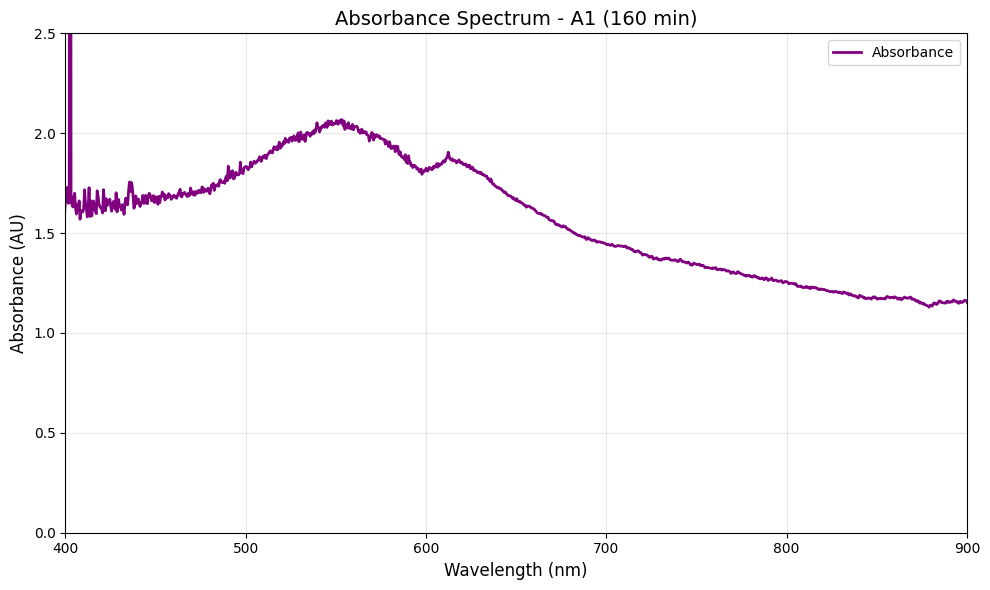

[2025-07-28 22:19:20] Spectrum recorded for vial A1 on Slot 2 at 160 mins

[2025-07-28 22:19:29] Washed Spectrometer Probe

[2025-07-28 22:19:38] Parked Spectrometer 

[2025-07-28 22:19:38] Sleeping for 3 seconds before checking again

[2025-07-28 22:19:41] Sleeping for 3 seconds before checking again

[2025-07-28 22:19:44] Sleeping for 3 seconds before checking again

[2025-07-28 22:19:47] Sleeping for 3 seconds before checking again

[2025-07-28 22:19:50] Sleeping for 3 seconds before checking again

[2025-07-28 22:19:53] Sleeping for 3 seconds before checking again

[2025-07-28 22:19:56] Sleeping for 3 seconds before checking again

[2025-07-28 22:19:59] Sleeping for 3 seconds before checking again

[2025-07-28 22:20:02] Sleeping for 3 seconds before checking again

[2025-07-28 22:20:05] Sleeping for 3 seconds before checking again

[2025-07-28 22:20:08] Sleeping for 3 seconds before checking again

[2025-07-28 22:20:11] Sleeping for 3 seconds before checking again

[2025-07-28 22:2

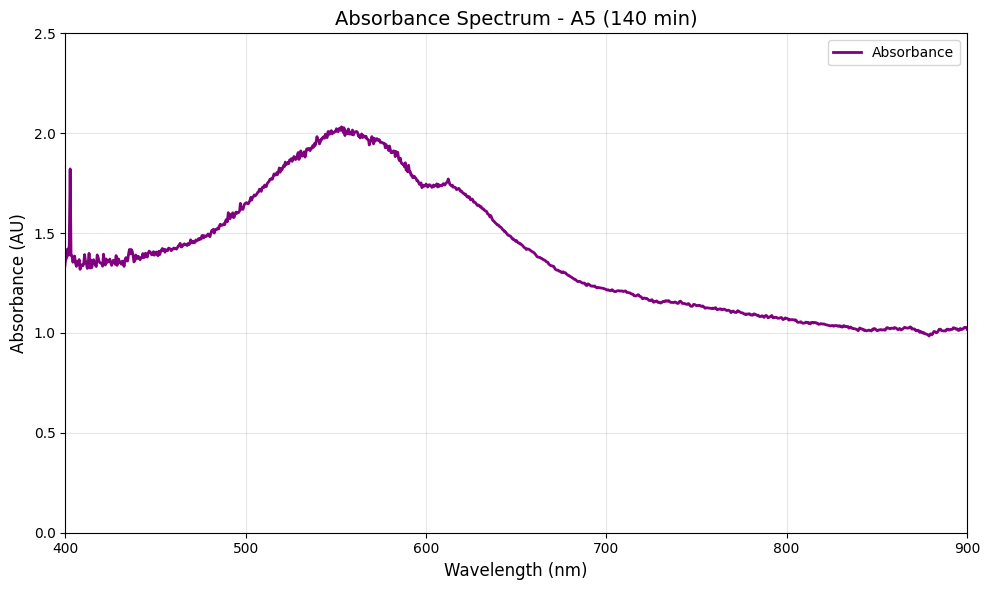

[2025-07-28 22:21:54] Spectrum recorded for vial A5 on Slot 2 at 140 mins

[2025-07-28 22:22:03] Washed Spectrometer Probe

[2025-07-28 22:22:13] Parked Spectrometer 

[2025-07-28 22:22:13] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:16] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:19] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:22] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:25] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:28] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:31] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:34] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:37] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:40] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:43] Sleeping for 3 seconds before checking again

[2025-07-28 22:22:46] Sleeping for 3 seconds before checking again

[2025-07-28 22:2

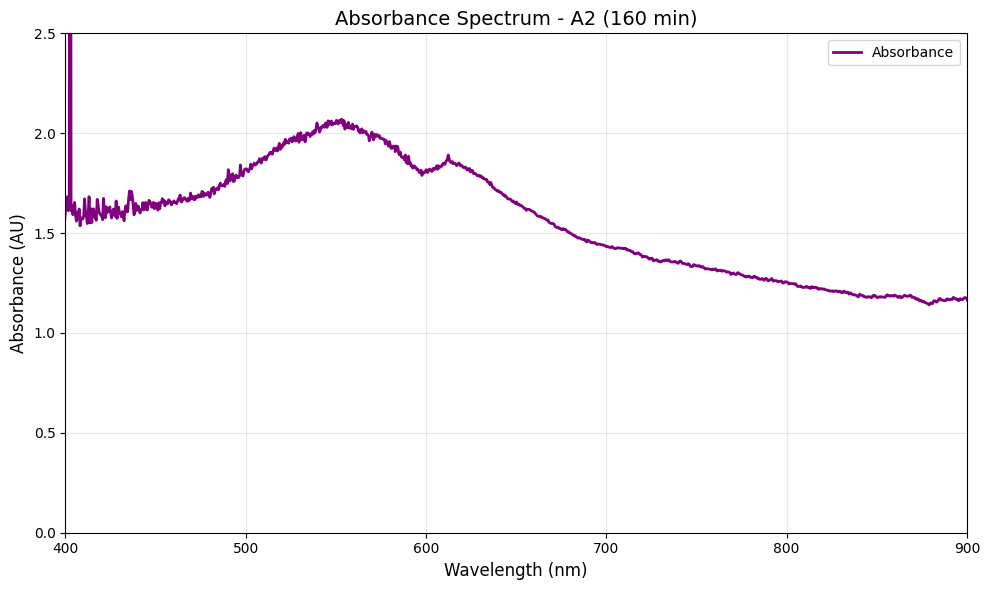

[2025-07-28 22:24:13] Spectrum recorded for vial A2 on Slot 2 at 160 mins

[2025-07-28 22:24:21] Washed Spectrometer Probe

[2025-07-28 22:24:31] Parked Spectrometer 

[2025-07-28 22:24:31] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:34] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:37] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:40] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:43] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:46] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:49] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:52] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:55] Sleeping for 3 seconds before checking again

[2025-07-28 22:24:58] Sleeping for 3 seconds before checking again

[2025-07-28 22:25:01] Sleeping for 3 seconds before checking again

[2025-07-28 22:25:04] Sleeping for 3 seconds before checking again

[2025-07-28 22:2

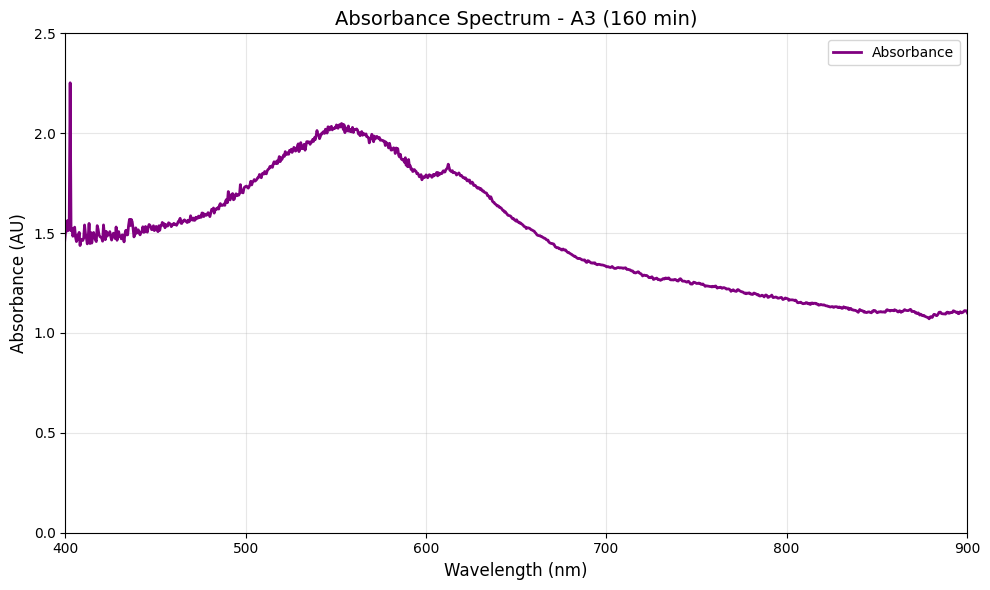

[2025-07-28 22:28:46] Spectrum recorded for vial A3 on Slot 2 at 160 mins

[2025-07-28 22:28:55] Washed Spectrometer Probe

[2025-07-28 22:29:04] Parked Spectrometer 

[2025-07-28 22:29:04] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:07] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:10] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:13] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:16] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:19] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:22] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:25] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:28] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:31] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:34] Sleeping for 3 seconds before checking again

[2025-07-28 22:29:37] Sleeping for 3 seconds before checking again

[2025-07-28 22:2

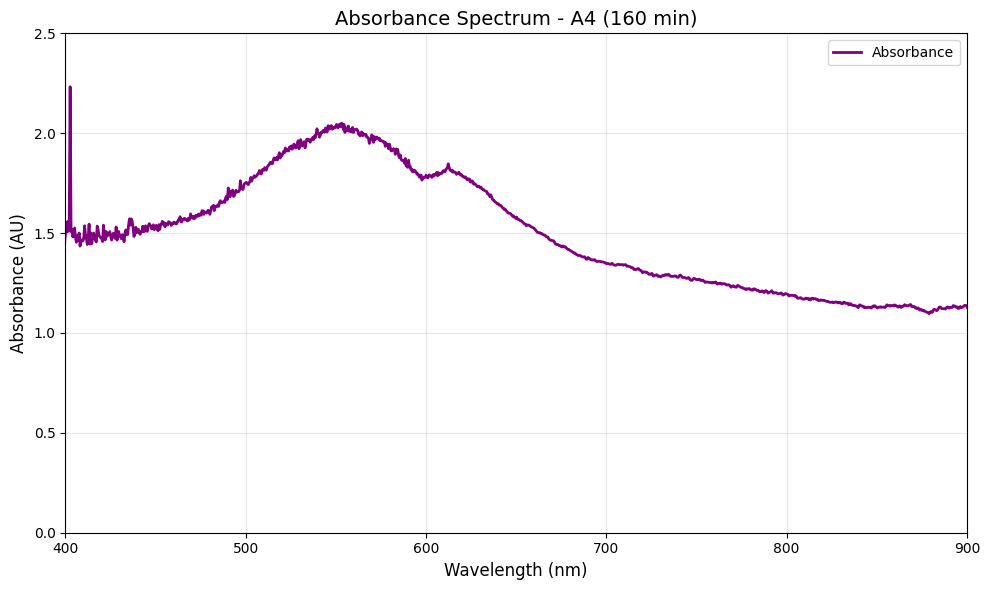

[2025-07-28 22:33:20] Spectrum recorded for vial A4 on Slot 2 at 160 mins

[2025-07-28 22:33:29] Washed Spectrometer Probe

[2025-07-28 22:33:39] Parked Spectrometer 

[2025-07-28 22:33:39] Sleeping for 3 seconds before checking again

[2025-07-28 22:33:42] Sleeping for 3 seconds before checking again

[2025-07-28 22:33:45] Sleeping for 3 seconds before checking again

[2025-07-28 22:33:48] Sleeping for 3 seconds before checking again

[2025-07-28 22:33:51] Sleeping for 3 seconds before checking again

[2025-07-28 22:33:54] Sleeping for 3 seconds before checking again

[2025-07-28 22:33:57] Sleeping for 3 seconds before checking again

[2025-07-28 22:34:00] Sleeping for 3 seconds before checking again

[2025-07-28 22:34:03] Sleeping for 3 seconds before checking again

[2025-07-28 22:34:06] Sleeping for 3 seconds before checking again

[2025-07-28 22:34:09] Sleeping for 3 seconds before checking again

[2025-07-28 22:34:12] Sleeping for 3 seconds before checking again

[2025-07-28 22:3

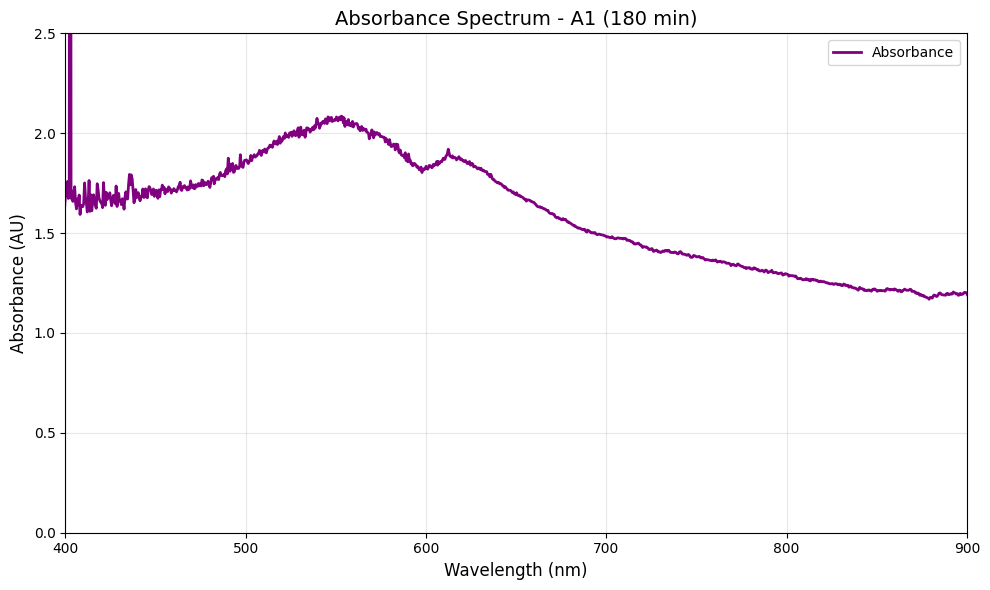

[2025-07-28 22:37:51] Spectrum recorded for vial A1 on Slot 2 at 180 mins

[2025-07-28 22:37:59] Washed Spectrometer Probe

[2025-07-28 22:38:08] Parked Spectrometer 

[2025-07-28 22:38:08] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:11] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:14] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:17] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:20] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:23] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:26] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:29] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:32] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:35] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:38] Sleeping for 3 seconds before checking again

[2025-07-28 22:38:41] Sleeping for 3 seconds before checking again

[2025-07-28 22:3

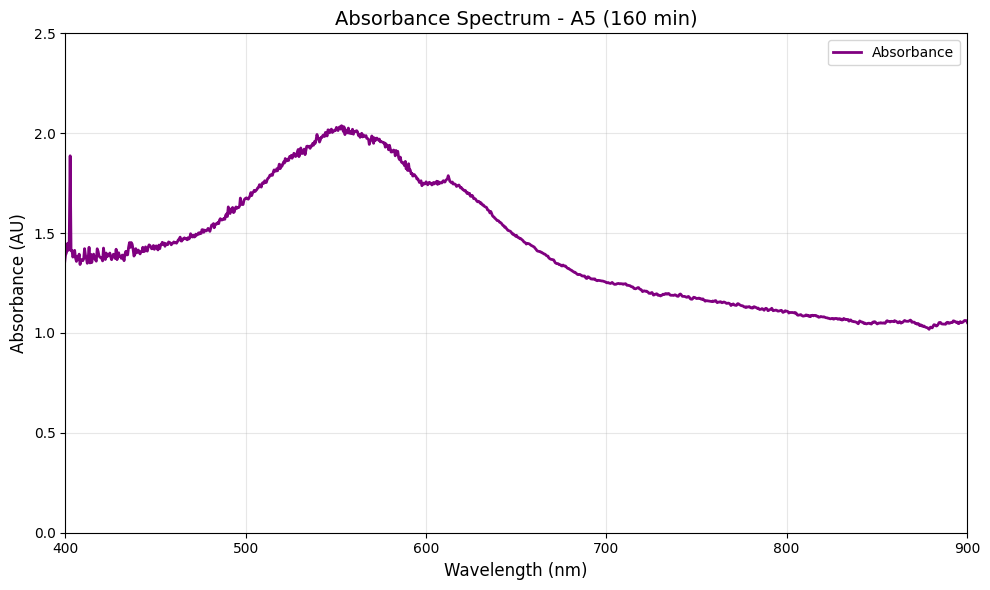

[2025-07-28 22:40:24] Spectrum recorded for vial A5 on Slot 2 at 160 mins

[2025-07-28 22:40:34] Washed Spectrometer Probe

[2025-07-28 22:40:43] Parked Spectrometer 

[2025-07-28 22:40:43] Sleeping for 3 seconds before checking again

[2025-07-28 22:40:46] Sleeping for 3 seconds before checking again

[2025-07-28 22:40:49] Sleeping for 3 seconds before checking again

[2025-07-28 22:40:52] Sleeping for 3 seconds before checking again

[2025-07-28 22:40:55] Sleeping for 3 seconds before checking again

[2025-07-28 22:40:58] Sleeping for 3 seconds before checking again

[2025-07-28 22:41:01] Sleeping for 3 seconds before checking again

[2025-07-28 22:41:04] Sleeping for 3 seconds before checking again

[2025-07-28 22:41:07] Sleeping for 3 seconds before checking again

[2025-07-28 22:41:10] Sleeping for 3 seconds before checking again

[2025-07-28 22:41:13] Sleeping for 3 seconds before checking again

[2025-07-28 22:41:16] Sleeping for 3 seconds before checking again

[2025-07-28 22:4

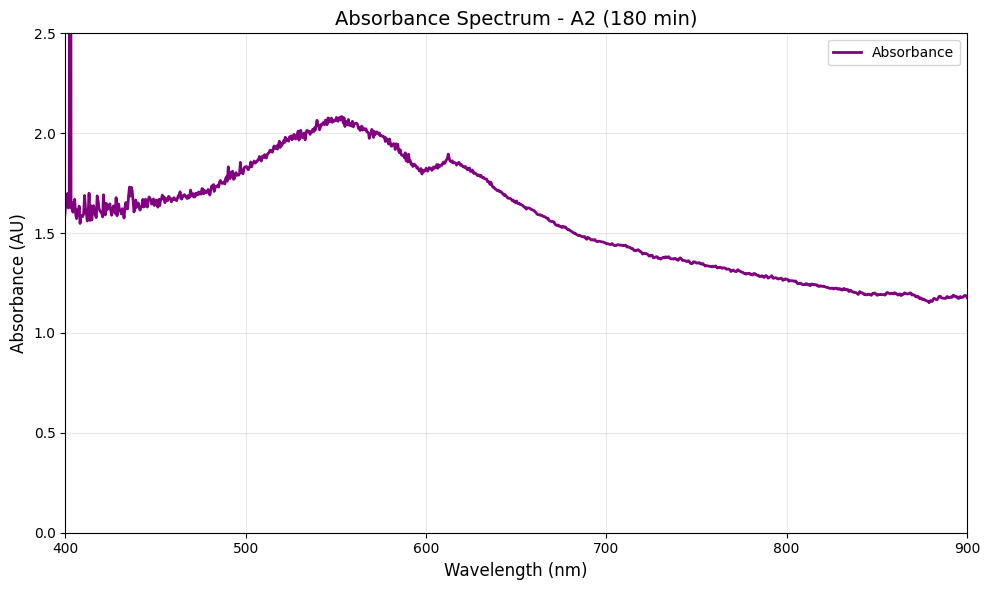

[2025-07-28 22:42:43] Spectrum recorded for vial A2 on Slot 2 at 180 mins

[2025-07-28 22:42:52] Washed Spectrometer Probe

[2025-07-28 22:43:01] Parked Spectrometer 

[2025-07-28 22:43:01] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:04] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:07] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:10] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:13] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:16] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:19] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:22] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:25] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:28] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:31] Sleeping for 3 seconds before checking again

[2025-07-28 22:43:34] Sleeping for 3 seconds before checking again

[2025-07-28 22:4

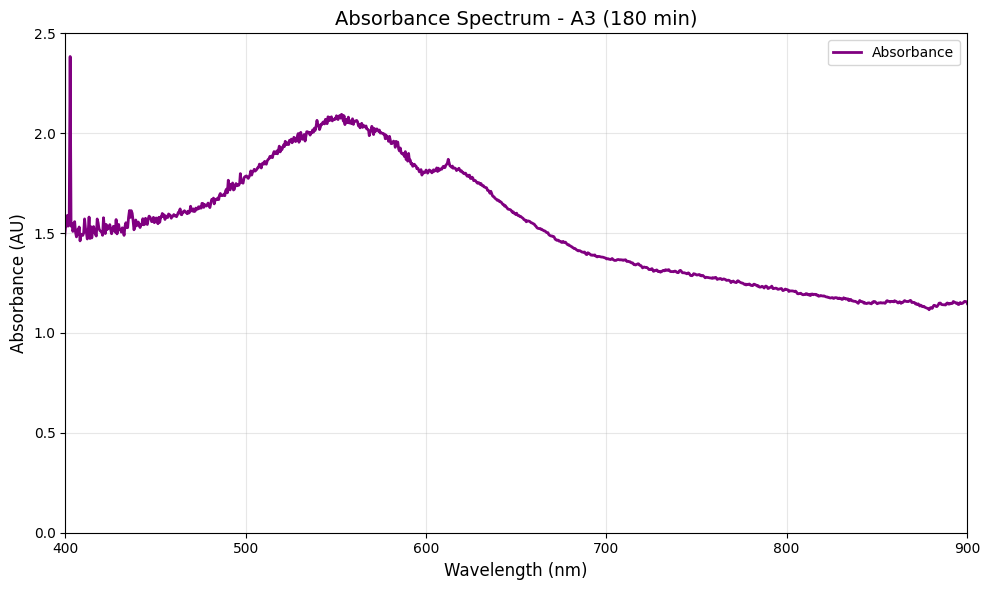

[2025-07-28 22:47:16] Spectrum recorded for vial A3 on Slot 2 at 180 mins

[2025-07-28 22:47:25] Washed Spectrometer Probe

[2025-07-28 22:47:35] Parked Spectrometer 

[2025-07-28 22:47:35] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:38] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:41] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:44] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:47] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:50] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:53] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:56] Sleeping for 3 seconds before checking again

[2025-07-28 22:47:59] Sleeping for 3 seconds before checking again

[2025-07-28 22:48:02] Sleeping for 3 seconds before checking again

[2025-07-28 22:48:05] Sleeping for 3 seconds before checking again

[2025-07-28 22:48:08] Sleeping for 3 seconds before checking again

[2025-07-28 22:4

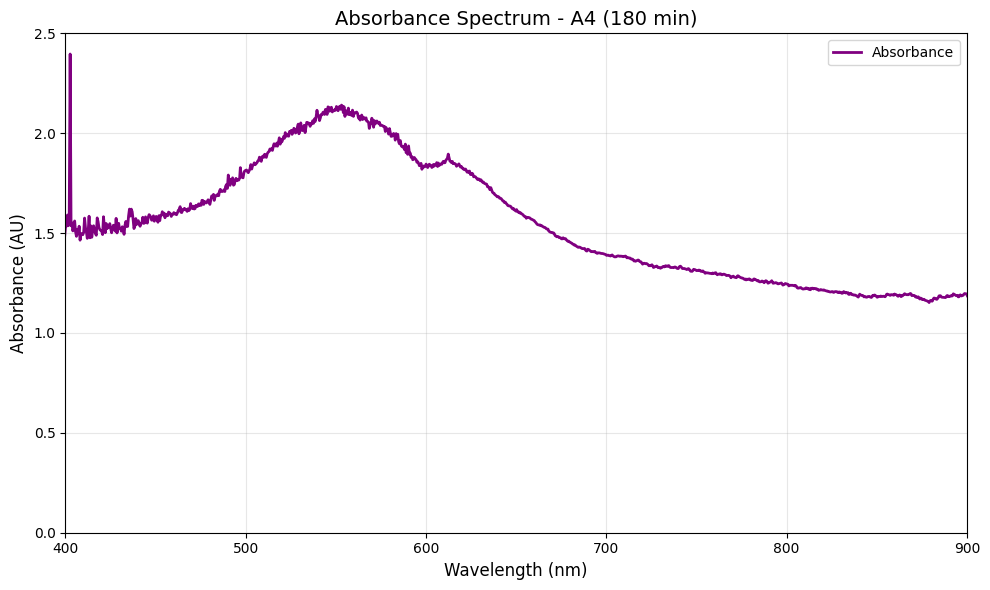

[2025-07-28 22:51:50] Spectrum recorded for vial A4 on Slot 2 at 180 mins

[2025-07-28 22:51:59] Washed Spectrometer Probe

[2025-07-28 22:52:09] Parked Spectrometer 

[2025-07-28 22:52:09] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:12] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:15] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:18] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:21] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:24] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:27] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:30] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:33] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:36] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:39] Sleeping for 3 seconds before checking again

[2025-07-28 22:52:42] Sleeping for 3 seconds before checking again

[2025-07-28 22:5

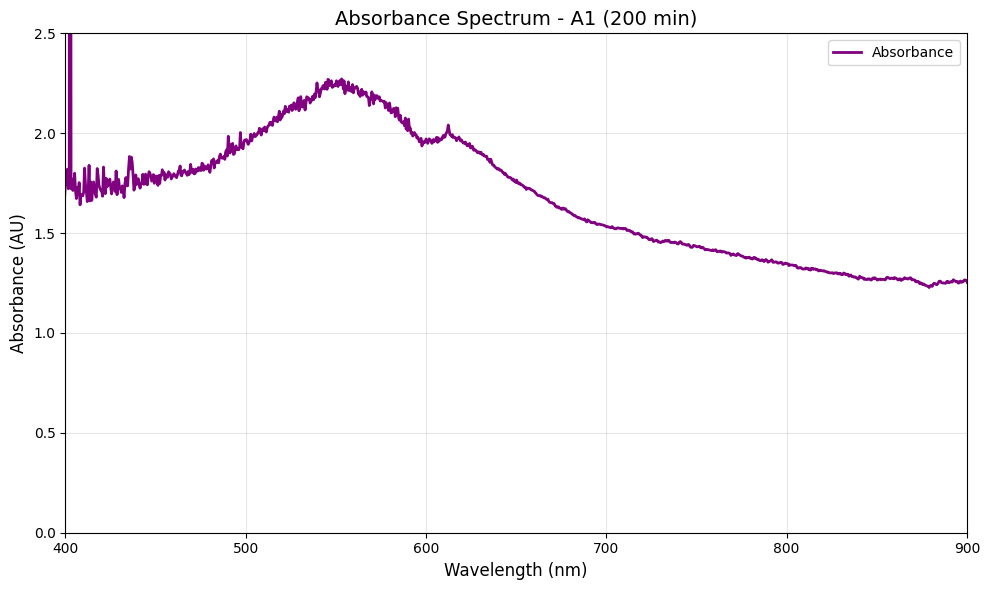

[2025-07-28 22:56:21] Spectrum recorded for vial A1 on Slot 2 at 200 mins

[2025-07-28 22:56:29] Washed Spectrometer Probe

[2025-07-28 22:56:38] Parked Spectrometer 

[2025-07-28 22:56:38] Sleeping for 3 seconds before checking again

[2025-07-28 22:56:41] Sleeping for 3 seconds before checking again

[2025-07-28 22:56:44] Sleeping for 3 seconds before checking again

[2025-07-28 22:56:47] Sleeping for 3 seconds before checking again

[2025-07-28 22:56:50] Sleeping for 3 seconds before checking again

[2025-07-28 22:56:53] Sleeping for 3 seconds before checking again

[2025-07-28 22:56:56] Sleeping for 3 seconds before checking again

[2025-07-28 22:56:59] Sleeping for 3 seconds before checking again

[2025-07-28 22:57:02] Sleeping for 3 seconds before checking again

[2025-07-28 22:57:05] Sleeping for 3 seconds before checking again

[2025-07-28 22:57:08] Sleeping for 3 seconds before checking again

[2025-07-28 22:57:11] Sleeping for 3 seconds before checking again

[2025-07-28 22:5

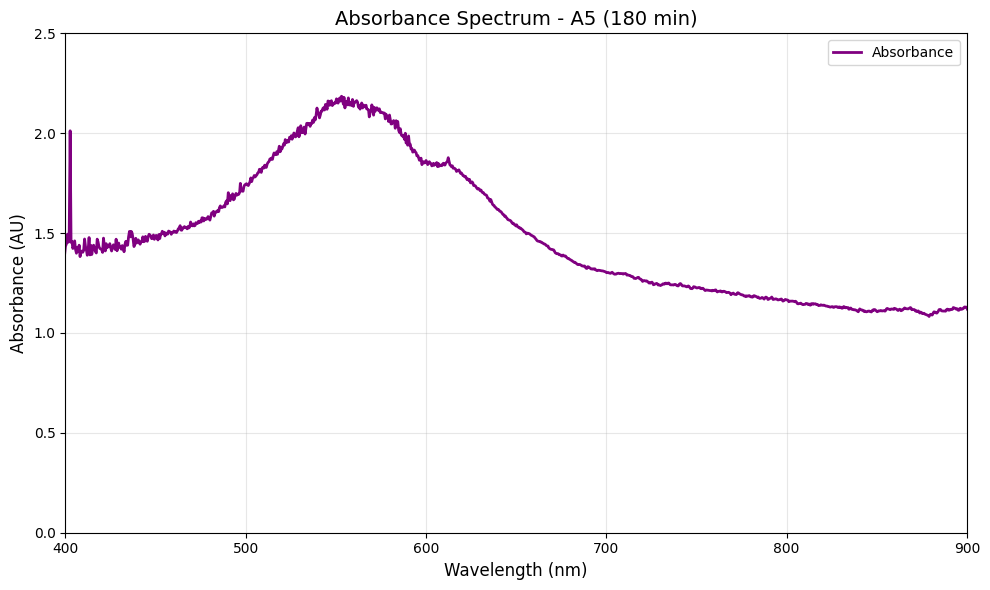

[2025-07-28 22:58:54] Spectrum recorded for vial A5 on Slot 2 at 180 mins

[2025-07-28 22:59:04] Washed Spectrometer Probe

[2025-07-28 22:59:13] Parked Spectrometer 

[2025-07-28 22:59:13] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:16] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:19] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:22] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:25] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:28] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:31] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:34] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:37] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:40] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:43] Sleeping for 3 seconds before checking again

[2025-07-28 22:59:46] Sleeping for 3 seconds before checking again

[2025-07-28 22:5

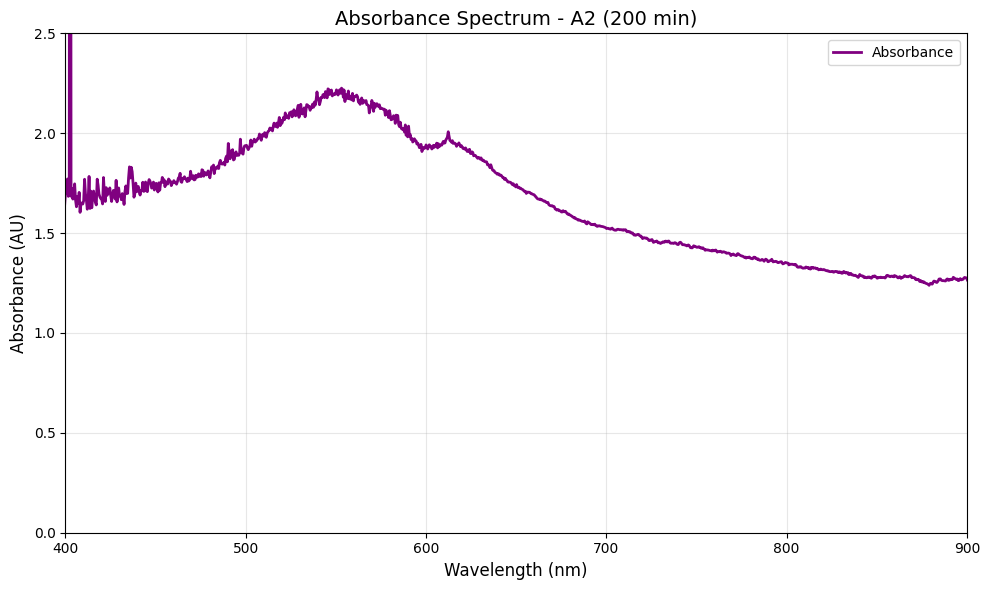

[2025-07-28 23:01:13] Spectrum recorded for vial A2 on Slot 2 at 200 mins

[2025-07-28 23:01:22] Washed Spectrometer Probe

[2025-07-28 23:01:31] Parked Spectrometer 

[2025-07-28 23:01:31] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:34] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:37] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:40] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:43] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:46] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:49] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:52] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:55] Sleeping for 3 seconds before checking again

[2025-07-28 23:01:58] Sleeping for 3 seconds before checking again

[2025-07-28 23:02:01] Sleeping for 3 seconds before checking again

[2025-07-28 23:02:04] Sleeping for 3 seconds before checking again

[2025-07-28 23:0

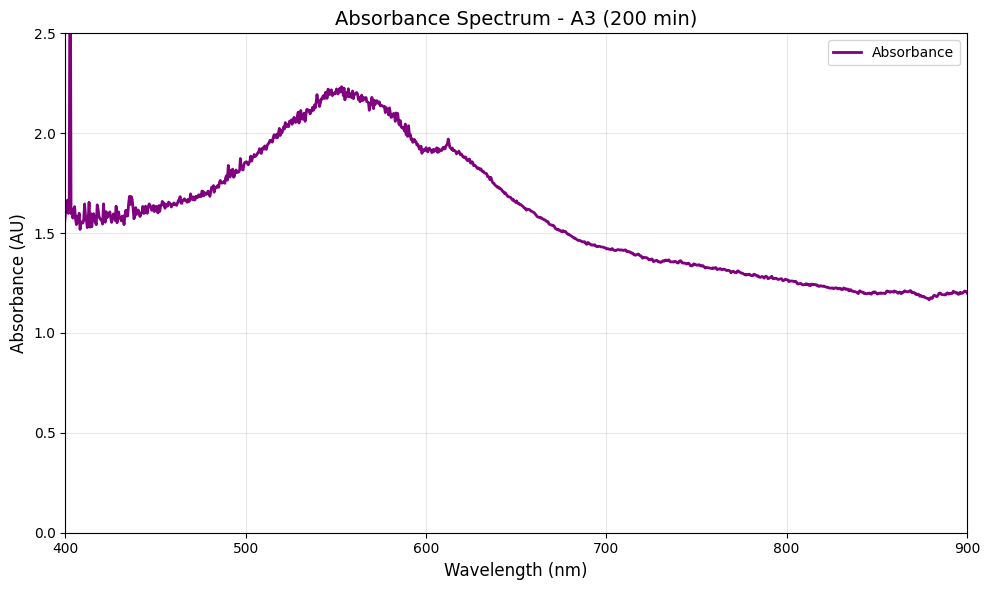

[2025-07-28 23:05:46] Spectrum recorded for vial A3 on Slot 2 at 200 mins

[2025-07-28 23:05:56] Washed Spectrometer Probe

[2025-07-28 23:06:05] Parked Spectrometer 

[2025-07-28 23:06:05] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:08] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:11] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:14] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:17] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:20] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:23] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:26] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:29] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:32] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:35] Sleeping for 3 seconds before checking again

[2025-07-28 23:06:38] Sleeping for 3 seconds before checking again

[2025-07-28 23:0

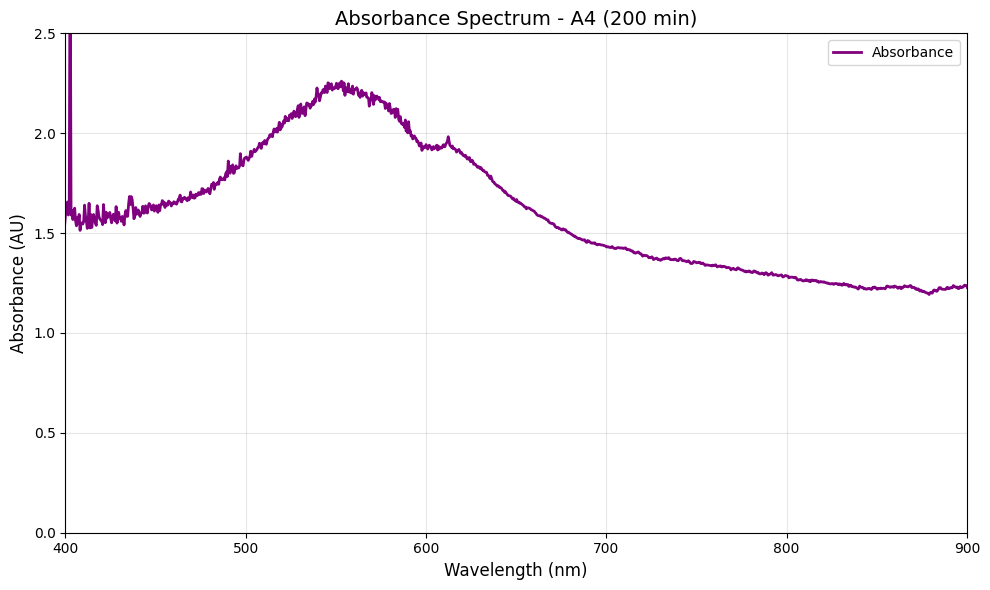

[2025-07-28 23:10:20] Spectrum recorded for vial A4 on Slot 2 at 200 mins

[2025-07-28 23:10:30] Washed Spectrometer Probe

[2025-07-28 23:10:39] Parked Spectrometer 

[2025-07-28 23:10:39] Sleeping for 3 seconds before checking again

[2025-07-28 23:10:42] Sleeping for 3 seconds before checking again

[2025-07-28 23:10:45] Sleeping for 3 seconds before checking again

[2025-07-28 23:10:48] Sleeping for 3 seconds before checking again

[2025-07-28 23:10:51] Sleeping for 3 seconds before checking again

[2025-07-28 23:10:54] Sleeping for 3 seconds before checking again

[2025-07-28 23:10:57] Sleeping for 3 seconds before checking again

[2025-07-28 23:11:00] Sleeping for 3 seconds before checking again

[2025-07-28 23:11:03] Sleeping for 3 seconds before checking again

[2025-07-28 23:11:06] Sleeping for 3 seconds before checking again

[2025-07-28 23:11:09] Sleeping for 3 seconds before checking again

[2025-07-28 23:11:12] Sleeping for 3 seconds before checking again

[2025-07-28 23:1

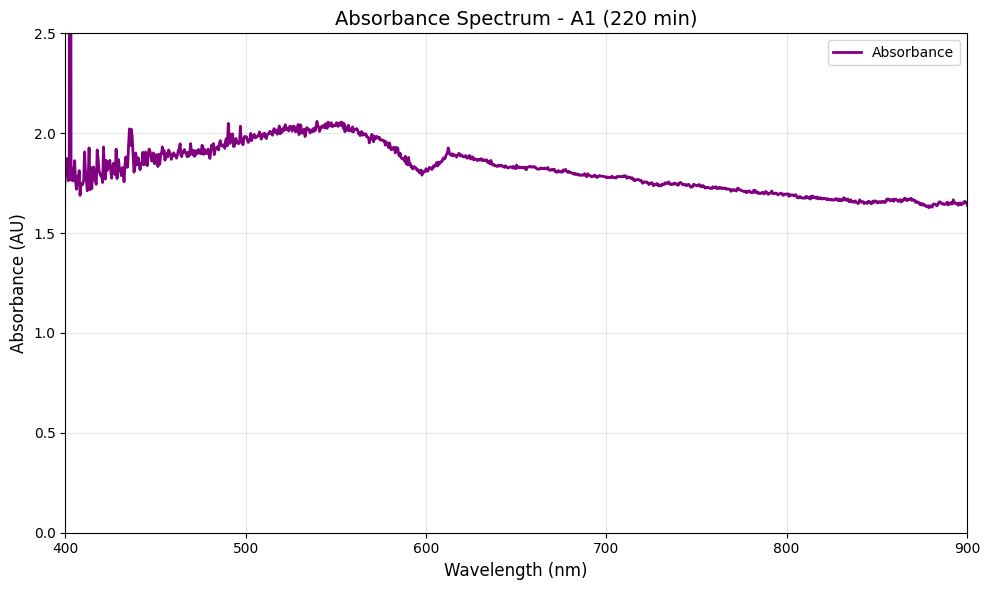

[2025-07-28 23:14:51] Spectrum recorded for vial A1 on Slot 2 at 220 mins

[2025-07-28 23:14:59] Washed Spectrometer Probe

[2025-07-28 23:15:09] Parked Spectrometer 

[2025-07-28 23:15:09] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:12] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:15] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:18] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:21] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:24] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:27] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:30] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:33] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:36] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:39] Sleeping for 3 seconds before checking again

[2025-07-28 23:15:42] Sleeping for 3 seconds before checking again

[2025-07-28 23:1

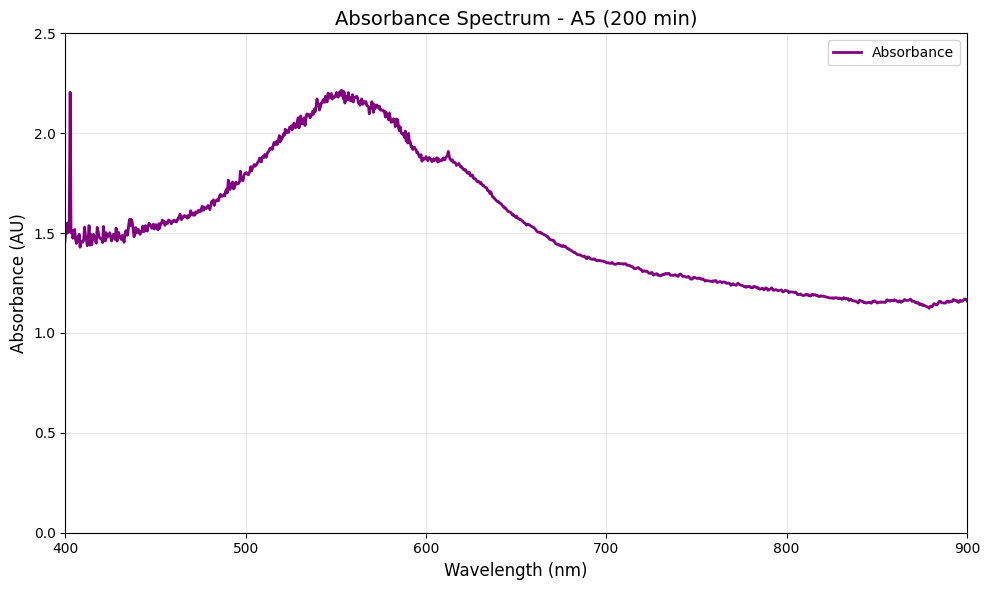

[2025-07-28 23:17:24] Spectrum recorded for vial A5 on Slot 2 at 200 mins

[2025-07-28 23:17:34] Washed Spectrometer Probe

[2025-07-28 23:17:43] Parked Spectrometer 

[2025-07-28 23:17:43] Sleeping for 3 seconds before checking again

[2025-07-28 23:17:46] Sleeping for 3 seconds before checking again

[2025-07-28 23:17:49] Sleeping for 3 seconds before checking again

[2025-07-28 23:17:52] Sleeping for 3 seconds before checking again

[2025-07-28 23:17:55] Sleeping for 3 seconds before checking again

[2025-07-28 23:17:58] Sleeping for 3 seconds before checking again

[2025-07-28 23:18:01] Sleeping for 3 seconds before checking again

[2025-07-28 23:18:04] Sleeping for 3 seconds before checking again

[2025-07-28 23:18:07] Sleeping for 3 seconds before checking again

[2025-07-28 23:18:10] Sleeping for 3 seconds before checking again

[2025-07-28 23:18:13] Sleeping for 3 seconds before checking again

[2025-07-28 23:18:16] Sleeping for 3 seconds before checking again

[2025-07-28 23:1

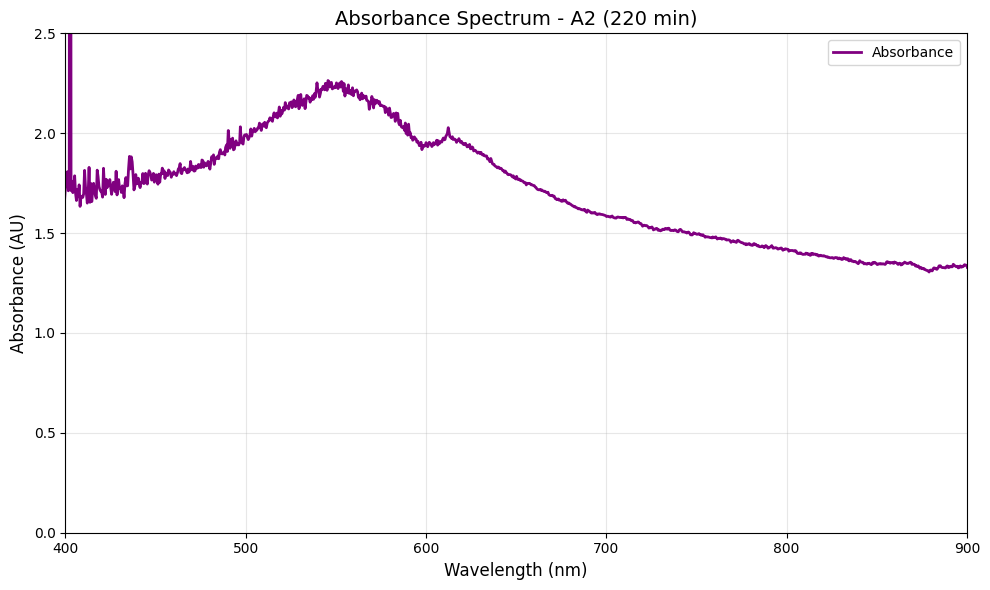

[2025-07-28 23:19:43] Spectrum recorded for vial A2 on Slot 2 at 220 mins

[2025-07-28 23:19:52] Washed Spectrometer Probe

[2025-07-28 23:20:01] Parked Spectrometer 

[2025-07-28 23:20:01] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:04] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:07] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:10] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:13] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:16] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:19] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:22] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:25] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:28] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:31] Sleeping for 3 seconds before checking again

[2025-07-28 23:20:34] Sleeping for 3 seconds before checking again

[2025-07-28 23:2

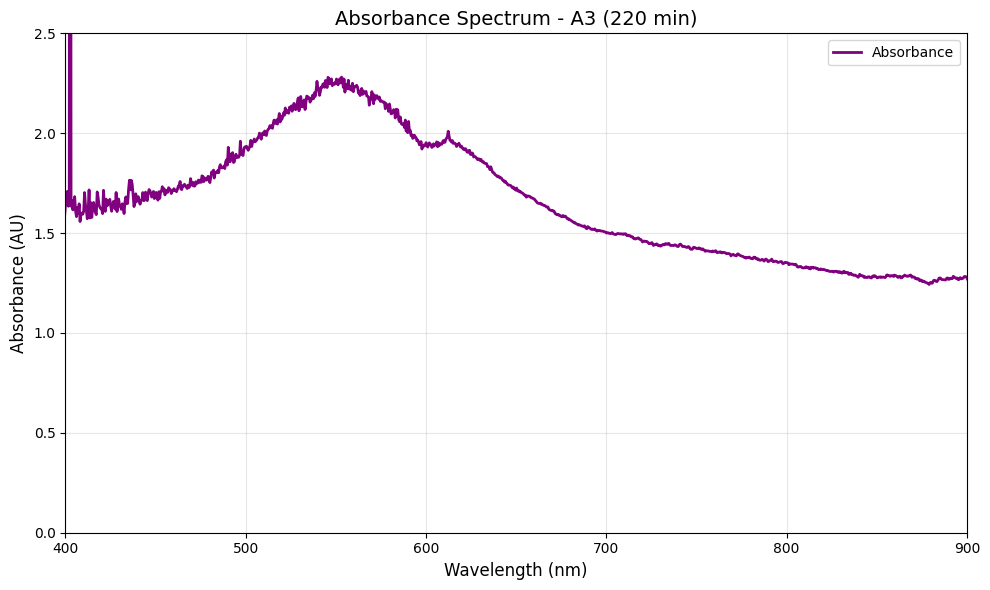

[2025-07-28 23:24:17] Spectrum recorded for vial A3 on Slot 2 at 220 mins

[2025-07-28 23:24:26] Washed Spectrometer Probe

[2025-07-28 23:24:35] Parked Spectrometer 

[2025-07-28 23:24:35] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:38] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:41] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:44] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:47] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:50] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:53] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:56] Sleeping for 3 seconds before checking again

[2025-07-28 23:24:59] Sleeping for 3 seconds before checking again

[2025-07-28 23:25:02] Sleeping for 3 seconds before checking again

[2025-07-28 23:25:05] Sleeping for 3 seconds before checking again

[2025-07-28 23:25:08] Sleeping for 3 seconds before checking again

[2025-07-28 23:2

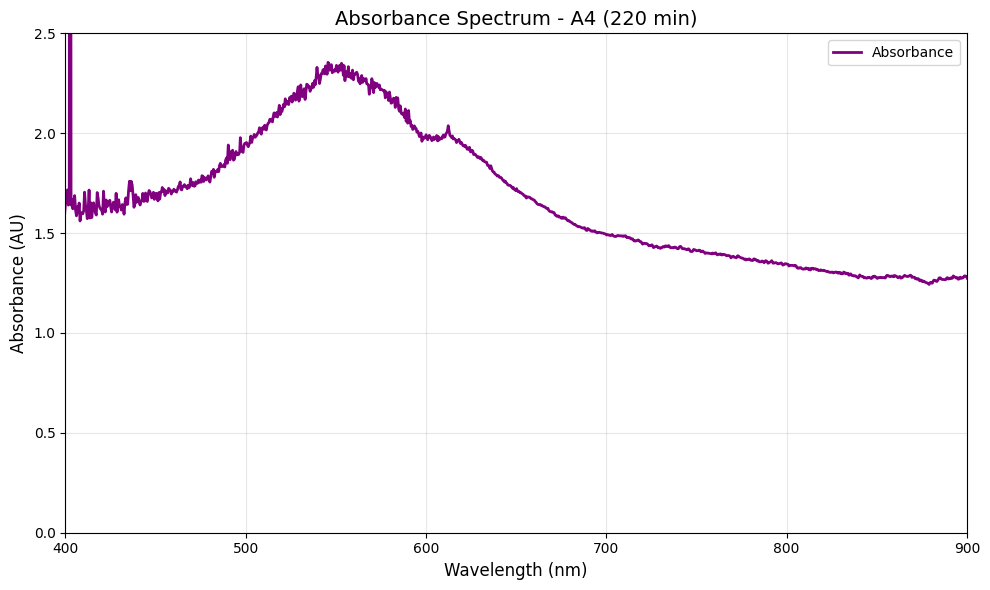

[2025-07-28 23:28:50] Spectrum recorded for vial A4 on Slot 2 at 220 mins

[2025-07-28 23:29:00] Washed Spectrometer Probe

[2025-07-28 23:29:09] Parked Spectrometer 

[2025-07-28 23:29:09] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:12] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:15] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:18] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:21] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:24] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:27] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:30] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:33] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:36] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:39] Sleeping for 3 seconds before checking again

[2025-07-28 23:29:42] Sleeping for 3 seconds before checking again

[2025-07-28 23:2

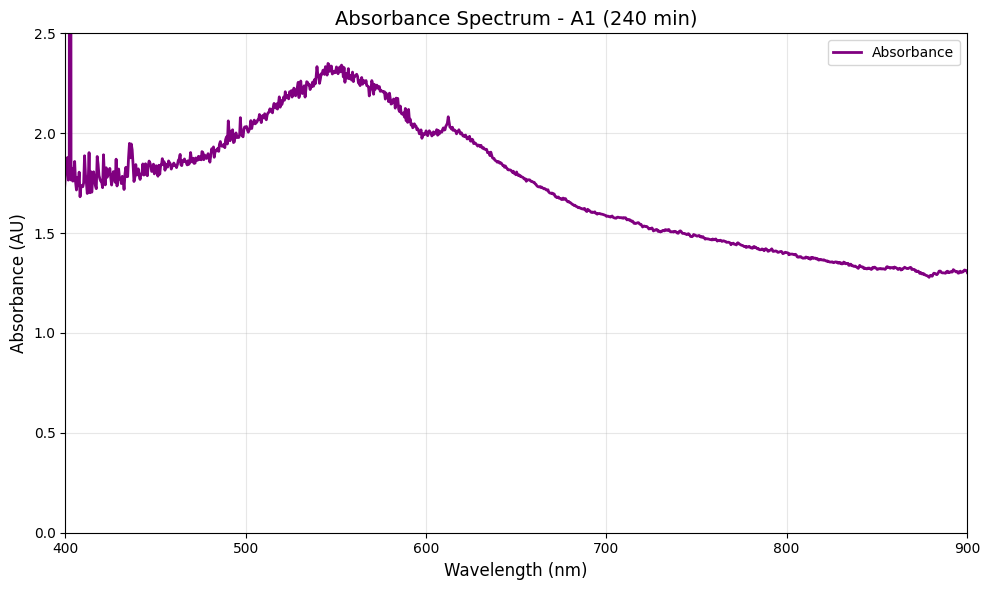

[2025-07-28 23:33:21] Spectrum recorded for vial A1 on Slot 2 at 240 mins

[2025-07-28 23:33:29] Washed Spectrometer Probe

[2025-07-28 23:33:39] Parked Spectrometer 

[2025-07-28 23:33:39] Sleeping for 3 seconds before checking again

[2025-07-28 23:33:42] Sleeping for 3 seconds before checking again

[2025-07-28 23:33:45] Sleeping for 3 seconds before checking again

[2025-07-28 23:33:48] Sleeping for 3 seconds before checking again

[2025-07-28 23:33:51] Sleeping for 3 seconds before checking again

[2025-07-28 23:33:54] Sleeping for 3 seconds before checking again

[2025-07-28 23:33:57] Sleeping for 3 seconds before checking again

[2025-07-28 23:34:00] Sleeping for 3 seconds before checking again

[2025-07-28 23:34:03] Sleeping for 3 seconds before checking again

[2025-07-28 23:34:06] Sleeping for 3 seconds before checking again

[2025-07-28 23:34:09] Sleeping for 3 seconds before checking again

[2025-07-28 23:34:12] Sleeping for 3 seconds before checking again

[2025-07-28 23:3

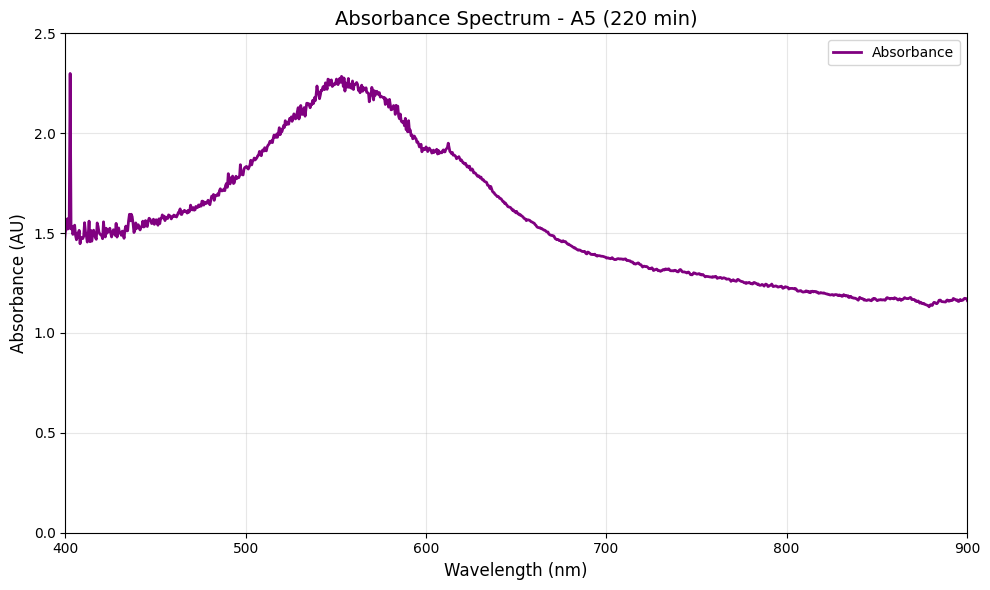

[2025-07-28 23:35:54] Spectrum recorded for vial A5 on Slot 2 at 220 mins

[2025-07-28 23:36:04] Washed Spectrometer Probe

[2025-07-28 23:36:13] Parked Spectrometer 

[2025-07-28 23:36:13] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:16] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:19] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:22] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:25] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:28] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:31] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:34] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:37] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:40] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:43] Sleeping for 3 seconds before checking again

[2025-07-28 23:36:46] Sleeping for 3 seconds before checking again

[2025-07-28 23:3

KeyboardInterrupt: 

In [8]:
# making a list of all the above loaded labware, tools and Machine objects 
all_labwares = {"slot1": {"precursors": precursors}, 
               "slot2": {"samples2_ssy":samples2_ssy, "samples2_sy": samples2_sy, "samples2_spec": samples2_spec},
               "slot3": { "solvents": solvents},
               "slot4": {"vacuum_location": vacuum_location},
               "slot5": { "samples5_ssy": samples5_ssy, "samples5_sy": samples5_sy, "samples5_spec": samples5_spec} }

all_tools = {"single_syringe": single_syringe, "dual_syringe": dual_syringe, "spectrometer": spectrometer, "gripper": gripper} 

from science_jubilee.Experiment import Experiment

# Initialising the Experiment 
exp = Experiment(machine= axo, deck = deck, all_tools= all_tools, all_labwares= all_labwares)

# Running the experiment
exp.make_batch(r"C:\Axo\science-jubilee\axo\axo_api_testing\draft_synthesis_plan.json")


In case of an error and the synthesis stops midway, reset both the syringes first

In [ ]:
axo.pickup_tool(dual_syringe)
print("Picked Up Dual Syringe")

# drive0 = dual_syringe.e0_drive
# current_pos0 = float(dual_syringe._machine.get_position()[drive0])
# headroom_mm0 = current_pos0 - dual_syringe.min_range
# headroom_ml0 = headroom_mm0 / dual_syringe.mm_to_ml
# dual_syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[0], s=500)
# current_pos = float(dual_syringe._machine.get_position()[drive0])
# print("Dual Syringe Drive 0 reset and position:", current_pos)

# drive1 = dual_syringe.e1_drive
# current_pos1 = float(dual_syringe._machine.get_position()[drive1])
# headroom_mm1 = current_pos1 - dual_syringe.min_range
# headroom_ml1 = headroom_mm1 / dual_syringe.mm_to_ml
# dual_syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=500)
# current_pos = float(dual_syringe._machine.get_position()[drive1])
# print("Dual Syringe Drive 1 reset and position:", current_pos)

drive0 = dual_syringe.e0_drive
current_pos0 = float(dual_syringe._machine.get_position()[drive0])
headroom_mm0 = current_pos0 - dual_syringe.min_range
headroom_ml0 = headroom_mm0 / dual_syringe.mm_to_ml
# dual_syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[0], s=500)

drive1 = dual_syringe.e1_drive
current_pos1 = float(dual_syringe._machine.get_position()[drive1])
headroom_mm1 = current_pos1 - dual_syringe.min_range
headroom_ml1 = headroom_mm1 / dual_syringe.mm_to_ml
# dual_syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=500)

x, y, z = dual_syringe._xy_for_drive(drive0, precursors[0]) 
dual_syringe._machine.safe_z_movement()
dual_syringe._machine.move_to(x=x, y=y, wait=True)
dual_syringe._machine.move_to(z=z, wait=True)

dual_syringe.reset_position()

# update the currentLiquidVolume of the precursors
dual_syringe.update_currentLiquidVolume(volume= headroom_ml0, location= precursors[1], is_dispense= True)
dual_syringe.update_currentLiquidVolume(volume= headroom_ml1, location= precursors[0], is_dispense= True)

# Log the resetting of the Dual Syringe
current_pos0 = float(dual_syringe._machine.get_position()[drive0])
current_pos1 = float(dual_syringe._machine.get_position()[drive1])

print("Dual Syringe Drive 0 reset and position:", current_pos0)
print("Dual Syringe Drive 1 reset and position:", current_pos1)

axo.park_tool()
print("Parked Dual Syringe")

Picked Up Dual Syringe
Error : Lid is on top of wellPlate: uwsunlab_2_wellplate_60000ul_slot1  on 1
Dual Syringe Drive 0 reset and position: 0.0
Error : Lid is on top of wellPlate: uwsunlab_2_wellplate_60000ul_slot1  on 1
Dual Syringe Drive 1 reset and position: 0.0
Parked Dual Syringe


In [ ]:
axo.pickup_tool(single_syringe)
print("Picked Up Single Syringe")

# single_syringe.dispense(vol= 5, sample_loc= samples2_ssy[0].top(10), refill_loc= solvents[1].top(10), s= 100)
# print("Dispensed 5ml solvent")


# drive = single_syringe.e_drive
# current_pos = float(single_syringe._machine.get_position()[drive])
# headroom_mm = current_pos - single_syringe.min_range
# headroom_ml = headroom_mm / single_syringe.mm_to_ml
# single_syringe.dispense(vol= headroom_ml, sample_loc=solvents[1].top(-10), refill_loc=solvents[1].top(-10), s=500)
# current_pos = float(single_syringe._machine.get_position()[drive])
# print("Single Syringe reset and position:", current_pos)

# Reset the Single syringe tool 
drive = single_syringe.e_drive 

x, y, z = Labware._getxyz(solvents[1])
single_syringe._machine.safe_z_movement()
single_syringe._machine.move_to(x=x, y=y)
single_syringe._machine.move_to(z=z)

current_pos = float(single_syringe._machine.get_position()[drive])
headroom_mm = current_pos - single_syringe.min_range
headroom_ml = headroom_mm / single_syringe.mm_to_ml
# single_syringe.dispense(vol= headroom_ml, sample_loc=solvents[1].top(-10), refill_loc=solvents[1].top(-10), s=500)

single_syringe.reset_position()

current_pos = float(single_syringe._machine.get_position()[drive])        
print(f"Single Syringe reset and position: {current_pos}")
print("Sleep for 5 seconds to let the drops fall off")
time.sleep(5)

# update the currentLiquidVolume of the solvents[1] well
single_syringe.update_currentLiquidVolume(volume= headroom_ml, location= solvents[1], is_dispense= True)



axo.park_tool()
print("Parked Single Syringe")

Parked Single Syringe


In [ ]:
# Vacuum Gripper functions 

axo.pickup_tool(gripper)
print("Picked Up Vacuum Gripper")

gripper.pick_and_place(vacuum_location[3],
                       vacuum_location[4], 0.7, 3)
print("Placed the plate") 

# gripper.drop(vacuum_location[4], 3)
# gripper.grip(vacuum_location[3], 0.7, 3)

axo.park_tool()
print("Parked Vacuum Gripper")

In [ ]:
# Spectrometer functions 

axo.pickup_tool(spectrometer)
print("Picked Up Spectrometer")

spectrometer.set_dark()
spectrometer.set_white()

spectrometer.configure_device()
print("Configured Spectrometer")

spectrometer.record_mof_recipe(well_id= "A1", metal_precursor_name= 'Fe_in_methanol', metal_precursor_vol_ml = 1, organic_precursor_name= 'Mn', organic_precursor_vol_ml = 1, solvent_name= 'methanol', solvent_vol_ml= 5)
wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples2_spec[0].top(-45), 0, save= True)
spectrometer.plot_spectrum(samples2_spec[0].top(-40), elapsed_min=0, show_plot=True, save_plot=True)  
print("Collected Blue Spectrum")